In [7]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
from config import *

PROJECT_ROOT = Path.cwd().parent




In [8]:
con = duckdb.connect(str(DB_PATH))
con.execute(f"PRAGMA memory_limit='{DUCKDB_MEMORY_LIMIT}';")
con.execute(f"PRAGMA threads={DUCKDB_THREADS};")
con.execute("PRAGMA enable_progress_bar=false;")
con.execute("PRAGMA disable_object_cache;")
con.execute("PRAGMA preserve_insertion_order=false;")

print("✅ Connecté à DuckDB")

✅ Connecté à DuckDB


In [9]:
tables = con.execute("SHOW TABLES").df()
print("Tables dans la base :")
display(tables)

for table in tables["name"]:
    n = con.execute(f"SELECT COUNT(*) FROM {table}").fetchone()[0]
    print(f"{table} : {n} lignes")

Tables dans la base :


name
0                         dpe
1                 dpe_adresse
2      dpe_adresse_harmonisee
3        dpe_ban_par_join_key
4   dpe_features_par_join_key
5      dpe_final_par_join_key
6              dpe_insee_norm
7                   dpe_keyed
8       dpe_modes_par_adresse
9                      enedis
10  enedis_dpe_analysis_ready
11     enedis_dpe_clean_final
12     enedis_dpe_clean_step1
13     enedis_dpe_clean_step2
14   enedis_dpe_dataset_final
15               enedis_keyed
16         enedis_par_commune

dpe : 17343297 lignes
dpe_adresse : 17343297 lignes
dpe_adresse_harmonisee : 17343297 lignes
dpe_ban_par_join_key : 4303906 lignes
dpe_features_par_join_key : 4303907 lignes
dpe_final_par_join_key : 4303907 lignes
dpe_insee_norm : 17343297 lignes
dpe_keyed : 17343297 lignes
dpe_modes_par_adresse : 4293407 lignes
enedis : 2304970 lignes
enedis_dpe_analysis_ready : 1119319 lignes
enedis_dpe_clean_final : 1119319 lignes
enedis_dpe_clean_step1 : 1214625 lignes
enedis_dpe_clean_step2 : 1214625 lignes
enedis_dpe_dataset_final : 2304970 lignes
enedis_keyed : 2304970 lignes
enedis_par_commune : 7277 lignes


In [ ]:
for row in con.execute("SHOW TABLES").fetchall():
    print(row[0])


In [ ]:

con.execute("SELECT * FROM dpe LIMIT 10").df()



In [ ]:
con.execute("SELECT * FROM enedis LIMIT 10").df()

In [ ]:
con.execute("DESCRIBE dpe").df()


In [ ]:
con.execute("DESCRIBE enedis").df()

In [ ]:
con.execute("SELECT COUNT(*) FROM dpe").df()

In [ ]:
con.execute("SELECT COUNT(*) FROM enedis").df()

In [ ]:
con.execute("""
SELECT adresse_ban
FROM dpe
LIMIT 20
""").df()


Normalizacion de la colonne adresse_insee_ban   dans la table DPE 

In [10]:

con.execute("""
CREATE OR REPLACE VIEW dpe_adresse_harmonisee AS
SELECT
    *,
    upper(
        trim(
            regexp_replace(
                regexp_replace(
                    regexp_replace(
                        adresse_ban,
                        '[0-9]{5}\\s+[A-Za-zÀ-ÿ\\- ]+$',   -- enlève "90200 Giromagny"
                        '',
                        'g'
                    ),
                    '[^A-Za-z0-9 ]',
                    ' ',
                    'g'
                ),
                '\\s+',
                ' ',
                'g'
            )
        )
    ) AS adresse_like_enedis
FROM dpe;
""")


In [7]:
con.execute("""
SELECT adresse_ban, adresse_like_enedis
FROM dpe_adresse_harmonisee
LIMIT 50
""").df()


adresse_ban  \
0                              10 Rue de la 1ere Dfl 90200 Giromagny   
1                                      Impasse Ventadour 19000 Tulle   
2                                     Rue Henri Barbusse 19000 Tulle   
3                                      2 Rue de la Botte 19000 Tulle   
4                              38 Avenue Alsace Lorraine 19000 Tulle   
5                                      35 Rue d’Arsonval 19000 Tulle   
6                                  44 Rue peyssonnel 13003 Marseille   
7                        43 Boulevard Henri PoincarÃ 66100 Perpignan   
8                           24 Allée de l’Église 74120 Praz-sur-Arly   
9                                      Quai Gabriel Peri 19000 Tulle   
10                             713 Route d'odier 74120 Demi-Quartier   
11                             713 Route d'odier 74120 Demi-Quartier   
12                            15 Rue Charles Lorilleux 92800 Puteaux   
13                                       Rue Anne Vialle 19000 Tulle   
14                                 5 Rue des Canadiens 76240 Belbeuf   
15                             445 Route de la Grange 74920 Combloux   
16                            14 Avenue Raymond Poincaré 19000 Tulle   
17                           1 Avenue du Colonel Monteil 19000 Tulle   
18                             40 Avenue Alsace Lorraine 19000 Tulle   
19                                         22 Rue Marbot 19000 Tulle   
20                               6a Rue des Carrières 68100 Mulhouse   
21                  46 Impasse des Coquelicots 01280 Prévessin-Moëns   
22                                      79 Rue Mirabeau 83150 Bandol   
23                                      79 Rue Mirabeau 83150 Bandol   
24                             9 Rue Francis Poulenc 17300 Rochefort   
25                                 45 Chemin de crusaz 74700 Domancy   
26                               13 Rue Pierre Jacoby 60000 Beauvais   
27                        5 Boulevard National 92500 Rueil-Malmaison   
28                                8 rue pierre rubens 25000 Besançon   
29                                Rue des Balayeurs 67000 Strasbourg   
30                          Rue Charles Nodier 39000 Lons-le-Saunier   
31                                   5 Allée des Saules 74000 Annecy   
32                  2455 Route de Thônes 74290 Menthon-Saint-Bernard   
33                                          6 rue Casteret 64000 Pau   
34                     120 Impasse du Hameau des Pistes 74120 Megève   
35                                 143bis Rue de Preize 10000 Troyes   
36                              20 Avenue Francis Bouët 49300 Cholet   
37                               13 Rue Pierre Jacoby 60000 Beauvais   
38  6 Quai Marechal de Lattre de Tassigny 88100 Saint-Dié-des-Vosges   
39                          26 Rue Charles de Gaulle 88400 Gérardmer   
40                                      49 rue bersot 25000 Besançon   
41               2 Allee de la Carriere a Cailloux 93230 Romainville   
42                                        26 Rue de Gand 59800 Lille   
43                                46 Rue des CLEMATITES 83600 Fréjus   
44                        4bis Rue Paul-Louis Cyfflé 54300 Lunéville   
45                 Avenue Irène et Frédéric Joliot Curie 13550 Noves   
46                              13 Rue de l'Abbé Deniau 49300 Cholet   
47                               13 Rue Pierre Jacoby 60000 Beauvais   
48                           4b Rue du Jeu de Paume 67000 Strasbourg   
49                      5 Chemin de la Passerelle 25420 Voujeaucourt   

                      adresse_like_enedis  
0                   10 RUE DE LA 1ERE DFL  
1                       IMPASSE VENTADOUR  
2                      RUE HENRI BARBUSSE  
3                       2 RUE DE LA BOTTE  
4               38 AVENUE ALSACE LORRAINE  
5                       35 RUE D ARSONVAL  
6                       44 RUE PEYSSONNEL  
7              43 BOULEVARD HENR

In [8]:
con.execute("""SELECT adresse FROM enedis LIMIT 20""").df()

adresse
0              14 RUE AGUETANT
1           71 RUE AIME PONCET
2     256 RUE ALEXANDRE BERARD
3     141 RUE ALEXANDRE BERARD
4      85 RUE ALEXANDRE BERARD
5      42 RUE ALEXANDRE BERARD
6       1 RUE ALEXANDRE BERARD
7              4 RUE BELLIEVRE
8              2 RUE BELLIEVRE
9            150 RUE BERTHELOT
10           117 RUE BERTHELOT
11            61 RUE BERTHELOT
12           15 RUE DE GERLAND
13         7 RUE DE L ALBARINE
14   85 ALLEE DE LA BARBOTIERE
15   57 ALLEE DE LA BARBOTIERE
16         2 RUE DE LA BATISSE
17   25 RUE DE LA COMMUNE 1871
18  23 AVENUE DE LA LIBERATION
19    222 RUE DE LA REPUBLIQUE

**Normalisation code code_insee_commune**

Les diagnostics de performance énergétique utilisent les codes INSEE des arrondissements pour Paris, Lyon et Marseille, tandis que les données Enedis sont agrégées au niveau communal. Afin d’assurer la cohérence territoriale des jointures, les codes INSEE des arrondissements ont été ramenés vers le code communal correspondant (Paris 75056, Lyon 69123, Marseille 13055), conformément aux conventions de l’INSEE.

In [11]:
con.execute("""
CREATE OR REPLACE VIEW dpe_insee_norm AS
SELECT
    *,
    CASE
        -- PARIS
        WHEN code_insee_ban BETWEEN '75101' AND '75120' THEN '75056'
        -- LYON
        WHEN code_insee_ban BETWEEN '69381' AND '69389' THEN '69123'
        -- MARSEILLE
        WHEN code_insee_ban BETWEEN '13201' AND '13216' THEN '13055'
        ELSE code_insee_ban
    END AS code_commune_norm
FROM dpe;
""")


In [12]:
con.execute("""
SELECT
    code_insee_ban,
    code_commune_norm,
    COUNT(*) AS n
FROM dpe_insee_norm
GROUP BY code_insee_ban, code_commune_norm
ORDER BY n DESC
LIMIT 100
""").df()


code_insee_ban code_commune_norm       n
0            None              None  117095
1           31555             31555   76902
2           44109             44109   50336
3           34172             34172   50025
4           76351             76351   48393
5           51454             51454   46191
6           33063             33063   44165
7           67482             67482   42563
8           68224             68224   36731
9           37261             37261   35340
10          59183             59183   34524
11          42218             42218   32143
12          57463             57463   29796
13          50129             50129   28954
14          49007             49007   28800
15          35238             35238   28702
16          87085             87085   28391
17          72181             72181   28139
18          59009             59009   28013
19          80021             80021   27924
20          69266             69266   27889
21          06088             06088   27867
22          59350             59350   26611
23          63113             63113   25979
24          76540             76540   25789
25          13001             13001   25475
26          38185             38185   25374
27          69389             69123   24985
28          69388             69123   24353
29          76217             76217   24253
30          69259             69259   24159
31          69387             69123   23980
32          75113             75056   23940
33          69383             69123   23900
34          75115             75056   23846
35          06029             06029   23813
36          33522             33522   23554
37          56121             56121   23539
38          45234             45234   23402
39          59512             59512   23085
40          92023             92023   22777
41          69385             69123   22765
42          13213             13055   22762
43          59599             59599   22708
44          13208             13055   22705
45          62498             62498   22652
46          13215             13055   22450
47          77284             77284   22333
48          69386             69123   22317
49          34301             34301   22260
50          64102             64102   22090
51          02691             02691   21997
52          78498             78498   21910
53          54547             54547   21861
54          76322             76322   21820
55          91174             91174   21812
56          13203             13055   21790
57          69382             69123   21756
58          69384             69123   21700
59          13209             13055   21671
60          77131             77131   21655
61          83137             83137   21638
62          11262             11262   21635
63          13212             13055   21550
64          59606             59606   21530
65          74281             74281   21524
66          51573             51573   21495
67          54395             54395   21457
68          69381             69123   21427
69          13211             13055   21422
70          19031             19031   21396
71          60159             60159   21387
72          81065             81065   21313
73          67447             67447   21312
74          78621             78621   21311
75          62193             62193   21281
76          77108             77108   21230
77          59178             59178   21202
78          13206             13055   21190
79          57332             57332   21162
80          75120             75056   21160
81          06030             06030   21145
82          03185             03185   21138
83          13214             13055   21119
84          34003             34003   21015
85          06069             06069   20981
86          13205             13055   20955
87          13202             13055   20893
88          13201             13055   20872
89          28134             28134   20748

In [13]:
# la valeur la plus fréquente de etiquette_dpe

# la valeur la plus fréquente de etiquette_ges

In [14]:
con.execute("""
CREATE OR REPLACE VIEW dpe_modes_par_adresse AS
WITH
-- 1) Comptage des classes DPE par adresse
cnt_dpe AS (
  SELECT
    identifiant_ban,
    etiquette_dpe,
    COUNT(*) AS n
  FROM dpe
  WHERE identifiant_ban IS NOT NULL
    AND etiquette_dpe IS NOT NULL
    AND TRIM(etiquette_dpe) <> ''
  GROUP BY identifiant_ban, etiquette_dpe
),
rank_dpe AS (
  SELECT
    *,
    ROW_NUMBER() OVER (
      PARTITION BY identifiant_ban
      ORDER BY n DESC, etiquette_dpe ASC
    ) AS rn
  FROM cnt_dpe
),
mode_dpe AS (
  SELECT
    identifiant_ban,
    etiquette_dpe AS etiquette_dpe_mode,
    n AS n_etiquette_dpe_mode
  FROM rank_dpe
  WHERE rn = 1
),

-- 2) Comptage des classes GES par adresse
cnt_ges AS (
  SELECT
    identifiant_ban,
    etiquette_ges,
    COUNT(*) AS n
  FROM dpe
  WHERE identifiant_ban IS NOT NULL
    AND etiquette_ges IS NOT NULL
    AND TRIM(etiquette_ges) <> ''
  GROUP BY identifiant_ban, etiquette_ges
),
rank_ges AS (
  SELECT
    *,
    ROW_NUMBER() OVER (
      PARTITION BY identifiant_ban
      ORDER BY n DESC, etiquette_ges ASC
    ) AS rn
  FROM cnt_ges
),
mode_ges AS (
  SELECT
    identifiant_ban,
    etiquette_ges AS etiquette_ges_mode,
    n AS n_etiquette_ges_mode
  FROM rank_ges
  WHERE rn = 1
)

-- 3) Résultat final : modes DPE + GES par adresse
SELECT
  COALESCE(mode_dpe.identifiant_ban, mode_ges.identifiant_ban) AS identifiant_ban,
  mode_dpe.etiquette_dpe_mode,
  mode_dpe.n_etiquette_dpe_mode,
  mode_ges.etiquette_ges_mode,
  mode_ges.n_etiquette_ges_mode
FROM mode_dpe
FULL JOIN mode_ges
  USING (identifiant_ban);
""")


In [15]:
con.execute("""
SELECT *
FROM dpe_modes_par_adresse
LIMIT 20
""").df()


identifiant_ban etiquette_dpe_mode  n_etiquette_dpe_mode  \
0       01004_0006_00354                  D                     1   
1       01004_0040_00176                  F                     1   
2       01004_0070_00007                  G                     2   
3   01004_0230_00001_bis                  A                     1   
4       01004_0320_00014                  E                     2   
5       01004_0380_00003                  F                     2   
6       01004_0398_00026                  C                     2   
7       01004_0459_00002                  D                     1   
8       01004_0610_00008                  G                     3   
9   01004_0630_00024_bis                  E                     1   
10      01004_0668_00004                  A                     1   
11    01004_nanli0_00189                  C                     1   
12      01005_0120_00204                  D                     1   
13      01005_0150_00264                  C                     1   
14      01005_0250_00270                  B                     2   
15      01006_0050_00248                  G                     1   
16      01007_0046_00005                  C                     1   
17      01007_0065_00008                  D                     1   
18      01007_0098_00355                  D                     1   
19      01007_0103_00442                  D                     1   

   etiquette_ges_mode  n_etiquette_ges_mode  
0                   B                     1  
1                   E                     1  
2                   F                     2  
3                   A                     1  
4                   B                     3  
5                   C                     2  
6                   C                     2  
7                   D                     1  
8                   E                     3  
9                   E                     1  
10                  A                     1  
11                  C                     1  
12                  B                     1  
13                  C                     1  
14                  A                     3  
15                  G                     1  
16                  A                     1  
17                  B                     1  
18                  B                     1  
19                  B                     1

In [16]:
# (Optionnel) Vérifier si tu as des “égalités” (ties)
con.execute("""
WITH cnt AS (
  SELECT identifiant_ban, etiquette_dpe, COUNT(*) AS n
  FROM dpe
  WHERE identifiant_ban IS NOT NULL AND etiquette_dpe IS NOT NULL AND TRIM(etiquette_dpe) <> ''
  GROUP BY identifiant_ban, etiquette_dpe
),
mx AS (
  SELECT identifiant_ban, MAX(n) AS nmax
  FROM cnt
  GROUP BY identifiant_ban
)
SELECT COUNT(*) AS nb_adresses_avec_egalite
FROM (
  SELECT c.identifiant_ban
  FROM cnt c
  JOIN mx ON c.identifiant_ban = mx.identifiant_ban AND c.n = mx.nmax
  GROUP BY c.identifiant_ban
  HAVING COUNT(*) > 1
);
""").df()


nb_adresses_avec_egalite
0                    282869

Combien de DPE partagent le même identifiant_ban ?
➡️ Si dpe_par_id_ban_moy > 1, ça confirme qu’un identifiant_ban correspond à plusieurs logements.

In [17]:
con.execute("""
SELECT
  COUNT(*) AS n_dpe,
  COUNT(DISTINCT identifiant_ban) AS n_id_ban_distinct,
  ROUND(1.0 * COUNT(*) / NULLIF(COUNT(DISTINCT identifiant_ban),0), 2) AS dpe_par_id_ban_moy
FROM dpe
WHERE identifiant_ban IS NOT NULL AND TRIM(identifiant_ban) <> '';
""").df()


n_dpe  n_id_ban_distinct  dpe_par_id_ban_moy
0  17217264            4293407                4.01

In [18]:
con.execute("DESCRIBE dpe").df()

column_name column_type  \
0                       configuration_installation_chauffage_n1     VARCHAR   
1                     conso_chauffage_installation_chauffage_n1      DOUBLE   
2                                     type_generateur_n1_ecs_n1     VARCHAR   
3                                               numero_voie_ban     VARCHAR   
4                                                     score_ban      DOUBLE   
5                                          conso_auxiliaires_ep      DOUBLE   
6                                             deperditions_murs      DOUBLE   
7                                                cout_eclairage      DOUBLE   
8                                          conso_auxiliaires_ef      DOUBLE   
9                                              statut_geocodage     VARCHAR   
10                                 ventilation_posterieure_2012      BIGINT   
11                                               cout_chauffage      DOUBLE   
12                                     conso_5_usages_par_m2_ep      DOUBLE   
13                                       date_etablissement_dpe     VARCHAR   
14                                      conso_ecs_ef_energie_n1      DOUBLE   
15                                      conso_ecs_ef_energie_n2      DOUBLE   
16                                       emission_ges_chauffage      DOUBLE   
17                        description_installation_chauffage_n1     VARCHAR   
18               qualite_isolation_plancher_haut_comble_amenage     VARCHAR   
19                                     conso_5_usages_par_m2_ef      DOUBLE   
20                                          cout_ecs_energie_n2      DOUBLE   
21                                conso_chauffage_ef_energie_n1      DOUBLE   
22                                conso_chauffage_ef_energie_n2      DOUBLE   
23                                        presence_brasseur_air      DOUBLE   
24                                qualite_isolation_menuiseries     VARCHAR   
25                               cout_total_5_usages_energie_n2      DOUBLE   
26                                           date_reception_dpe     VARCHAR   
27                               cout_total_5_usages_energie_n1      DOUBLE   
28                                          cout_ecs_energie_n1      DOUBLE   
29                                            isolation_toiture      DOUBLE   
30                                                   modele_dpe     VARCHAR   
31                                  qualite_isolation_enveloppe     VARCHAR   
32                conso_chauffage_generateur_n1_installation_n1      DOUBLE   
33                                              type_energie_n1     VARCHAR   
34                                       emission_ges_eclairage      DOUBLE   
35                                              type_energie_n2     VARCHAR   
36                                              code_postal_ban     VARCHAR   
37                                             emission_ges_ecs      DOUBLE   
38                                 conso_5_usages_ef_energie_n2      DOUBLE   
39                                            conso_5_usages_ef      DOUBLE   
40                                 conso_5_usages_ef_energie_n1      DOUBLE   
41                                               code_insee_ban     VARCHAR   
42                                   deperditions_planchers_bas      DOUBLE   
43                                            conso_5_usages_ep      DOUBLE   
44                                        date_fin_validite_dpe     VARCHAR   
45                                       deperditions_enveloppe      DOUBLE   
46                                  complement_adresse_batiment     VARCHAR   
47                                              code_region_ban     VARCHAR   
48                         volume_stockage_generateur_n1_ecs_n1      DOUBLE   
49                   surface_chauffee_installation_chauffage_n1      DOUBLE   
50                     

In [19]:
con.execute("""SELECT type_batiment FROM dpe LIMIT 50""").df()

type_batiment
0    appartement
1    appartement
2    appartement
3    appartement
4    appartement
5    appartement
6    appartement
7    appartement
8    appartement
9    appartement
10   appartement
11   appartement
12   appartement
13   appartement
14   appartement
15   appartement
16   appartement
17   appartement
18   appartement
19   appartement
20   appartement
21   appartement
22   appartement
23   appartement
24   appartement
25   appartement
26   appartement
27   appartement
28   appartement
29   appartement
30   appartement
31   appartement
32   appartement
33   appartement
34   appartement
35   appartement
36   appartement
37   appartement
38   appartement
39   appartement
40   appartement
41   appartement
42   appartement
43   appartement
44   appartement
45   appartement
46   appartement
47   appartement
48   appartement
49   appartement

In [20]:
con.execute("""SELECT numero_rpls_logement FROM dpe LIMIT 50""").df()

numero_rpls_logement
0                  None
1                  None
2                  None
3                  None
4                  None
5                  None
6                  None
7                  None
8                  None
9                  None
10                 None
11                 None
12                 None
13                 None
14                 None
15                 None
16                 None
17                 None
18                 None
19                 None
20                 None
21                 None
22                 None
23                 None
24                 None
25                 None
26                 None
27                 None
28                 None
29                 None
30                 None
31                 None
32                 None
33                 None
34                 None
35                 None
36                 None
37                 None
38                 None
39                 None
40                 None
41                 None
42                 None
43                 None
44                 None
45                 None
46                 None
47                 None
48                 None
49                 None

In [21]:
con.execute("""
SELECT
    MIN(numero_rpls_logement) AS minimo,
    MAX(numero_rpls_logement) AS maximo
FROM dpe;
""").df()


minimo    maximo
0  00000000  92062087

**jointure**

In [22]:
con.execute("""
CREATE OR REPLACE VIEW dpe_keyed AS
SELECT
  d.*,

  -- 1) adresse_like_enedis (ta normalisation)
  upper(
    trim(
      regexp_replace(
        regexp_replace(
          regexp_replace(
            d.adresse_ban,
            '[0-9]{5}\\s+[A-Za-zÀ-ÿ\\- ]+$',
            '',
            'g'
          ),
          '[^A-Za-z0-9 ]',
          ' ',
          'g'
        ),
        '\\s+',
        ' ',
        'g'
      )
    )
  ) AS adresse_like_enedis,

  -- 2) code_commune_norm (arrondissements -> commune)
  CASE
    WHEN d.code_insee_ban BETWEEN '75101' AND '75120' THEN '75056'
    WHEN d.code_insee_ban BETWEEN '69381' AND '69389' THEN '69123'
    WHEN d.code_insee_ban BETWEEN '13201' AND '13216' THEN '13055'
    ELSE d.code_insee_ban
  END AS code_commune_norm,

  -- 3) join_key final
  (
    upper(
      trim(
        regexp_replace(
          regexp_replace(
            regexp_replace(
              d.adresse_ban,
              '[0-9]{5}\\s+[A-Za-zÀ-ÿ\\- ]+$',
              '',
              'g'
            ),
            '[^A-Za-z0-9 ]',
            ' ',
            'g'
          ),
          '\\s+',
          ' ',
          'g'
        )
      )
    )
    || '|' ||
    CASE
      WHEN d.code_insee_ban BETWEEN '75101' AND '75120' THEN '75056'
      WHEN d.code_insee_ban BETWEEN '69381' AND '69389' THEN '69123'
      WHEN d.code_insee_ban BETWEEN '13201' AND '13216' THEN '13055'
      ELSE d.code_insee_ban
    END
  ) AS join_key

FROM dpe d;
""")


In [23]:
con.execute("""
SELECT adresse_ban, adresse_like_enedis, code_insee_ban, code_commune_norm, join_key
FROM dpe_keyed
LIMIT 10;
""").df()


adresse_ban   adresse_like_enedis  \
0      66 Rue de Meyrin 01210 Ferney-Voltaire      66 RUE DE MEYRIN   
1      64 Rue de Meyrin 01210 Ferney-Voltaire      64 RUE DE MEYRIN   
2   1 Impasse de l’Ouye 01210 Ferney-Voltaire   1 IMPASSE DE L OUYE   
3   5 Impasse de l’Ouye 01210 Ferney-Voltaire   5 IMPASSE DE L OUYE   
4   10 Impasse du Pégan 01210 Ferney-Voltaire   10 IMPASSE DU P GAN   
5      62 Rue de Meyrin 01210 Ferney-Voltaire      62 RUE DE MEYRIN   
6   1 Impasse de l’Ouye 01210 Ferney-Voltaire   1 IMPASSE DE L OUYE   
7  13 Chemin des Fleurs 01210 Ferney-Voltaire  13 CHEMIN DES FLEURS   
8    2 Impasse du Pégan 01210 Ferney-Voltaire    2 IMPASSE DU P GAN   
9    4 Impasse du Pégan 01210 Ferney-Voltaire    4 IMPASSE DU P GAN   

  code_insee_ban code_commune_norm                    join_key  
0          01160             01160      66 RUE DE MEYRIN|01160  
1          01160             01160      64 RUE DE MEYRIN|01160  
2          01160             01160   1 IMPASSE DE L OUYE|01160  
3          01160             01160   5 IMPASSE DE L OUYE|01160  
4          01160             01160   10 IMPASSE DU P GAN|01160  
5          01160             01160      62 RUE DE MEYRIN|01160  
6          01160             01160   1 IMPASSE DE L OUYE|01160  
7          01160             01160  13 CHEMIN DES FLEURS|01160  
8          01160             01160    2 IMPASSE DU P GAN|01160  
9          01160             01160    4 IMPASSE DU P GAN|01160

In [24]:
con.execute("""
SELECT adresse, code_commune,
       upper(trim(regexp_replace(regexp_replace(adresse, '[^A-Za-z0-9 ]', ' ', 'g'), '\\s+', ' ', 'g'))) AS adresse_norm,
       (upper(trim(regexp_replace(regexp_replace(adresse, '[^A-Za-z0-9 ]', ' ', 'g'), '\\s+', ' ', 'g')))
        || '|' || trim(code_commune)) AS join_key
FROM enedis
LIMIT 10;
""").df()


adresse code_commune              adresse_norm  \
0           14 RUE AGUETANT        01004           14 RUE AGUETANT   
1        71 RUE AIME PONCET        01004        71 RUE AIME PONCET   
2  256 RUE ALEXANDRE BERARD        01004  256 RUE ALEXANDRE BERARD   
3  141 RUE ALEXANDRE BERARD        01004  141 RUE ALEXANDRE BERARD   
4   85 RUE ALEXANDRE BERARD        01004   85 RUE ALEXANDRE BERARD   
5   42 RUE ALEXANDRE BERARD        01004   42 RUE ALEXANDRE BERARD   
6    1 RUE ALEXANDRE BERARD        01004    1 RUE ALEXANDRE BERARD   
7           4 RUE BELLIEVRE        01004           4 RUE BELLIEVRE   
8           2 RUE BELLIEVRE        01004           2 RUE BELLIEVRE   
9         150 RUE BERTHELOT        01004         150 RUE BERTHELOT   

                         join_key  
0           14 RUE AGUETANT|01004  
1        71 RUE AIME PONCET|01004  
2  256 RUE ALEXANDRE BERARD|01004  
3  141 RUE ALEXANDRE BERARD|01004  
4   85 RUE ALEXANDRE BERARD|01004  
5   42 RUE ALEXANDRE BERARD|01004  
6    1 RUE ALEXANDRE BERARD|01004  
7           4 RUE BELLIEVRE|01004  
8           2 RUE BELLIEVRE|01004  
9         150 RUE BERTHELOT|01004

In [25]:
#Étape A — Créer enedis_keyed (avec join_key)
con.execute("""
CREATE OR REPLACE VIEW enedis_keyed AS
SELECT
  *,
  upper(trim(regexp_replace(regexp_replace(adresse, '[^A-Za-z0-9 ]', ' ', 'g'), '\\s+', ' ', 'g'))) AS adresse_norm,
  (upper(trim(regexp_replace(regexp_replace(adresse, '[^A-Za-z0-9 ]', ' ', 'g'), '\\s+', ' ', 'g')))
   || '|' || trim(code_commune)) AS join_key
FROM enedis
WHERE adresse IS NOT NULL AND trim(adresse) <> ''
  AND code_commune IS NOT NULL AND trim(code_commune) <> '';
""")


In [26]:
#Étape B — Construire un DPE “par adresse” avec tes variables + classes (1 ligne par join_key)
con.execute("""
CREATE OR REPLACE VIEW dpe_ban_par_join_key AS
SELECT
  join_key,
  ANY_VALUE(identifiant_ban) AS identifiant_ban
FROM dpe_keyed
WHERE identifiant_ban IS NOT NULL AND trim(identifiant_ban) <> ''
GROUP BY join_key;
""")


In [27]:
con.execute("""
CREATE OR REPLACE VIEW dpe_features_par_join_key AS
WITH
stats_num AS (
  SELECT
    join_key,
    COUNT(*) AS n_logements_dpe,
    median(annee_construction) AS annee_construction_med,
    median(surface_habitable_logement) AS surface_habitable_med
  FROM dpe_keyed
  GROUP BY join_key
),

cnt AS (
  SELECT join_key, 'type_batiment' AS var, type_batiment AS val, COUNT(*) n
  FROM dpe_keyed
  WHERE type_batiment IS NOT NULL AND trim(type_batiment) <> ''
  GROUP BY join_key, type_batiment

  UNION ALL
  SELECT join_key, 'isol_enveloppe', qualite_isolation_enveloppe, COUNT(*) n
  FROM dpe_keyed
  WHERE qualite_isolation_enveloppe IS NOT NULL AND trim(qualite_isolation_enveloppe) <> ''
  GROUP BY join_key, qualite_isolation_enveloppe

  UNION ALL
  SELECT join_key, 'isol_murs', qualite_isolation_murs, COUNT(*) n
  FROM dpe_keyed
  WHERE qualite_isolation_murs IS NOT NULL AND trim(qualite_isolation_murs) <> ''
  GROUP BY join_key, qualite_isolation_murs

  UNION ALL
  -- ✅ correction ici : toiture -> plancher_haut_toit_terrasse
  SELECT join_key, 'isol_toit', qualite_isolation_plancher_haut_toit_terrasse, COUNT(*) n
  FROM dpe_keyed
  WHERE qualite_isolation_plancher_haut_toit_terrasse IS NOT NULL
    AND trim(qualite_isolation_plancher_haut_toit_terrasse) <> ''
  GROUP BY join_key, qualite_isolation_plancher_haut_toit_terrasse

  UNION ALL
  SELECT join_key, 'isol_plancher', qualite_isolation_plancher_bas, COUNT(*) n
  FROM dpe_keyed
  WHERE qualite_isolation_plancher_bas IS NOT NULL AND trim(qualite_isolation_plancher_bas) <> ''
  GROUP BY join_key, qualite_isolation_plancher_bas
),
ranked AS (
  SELECT *,
         ROW_NUMBER() OVER (PARTITION BY join_key, var ORDER BY n DESC, val ASC) rn
  FROM cnt
),
modes_cat AS (
  SELECT
    join_key,
    MAX(CASE WHEN var='type_batiment' THEN val END) AS type_batiment_mode,
    MAX(CASE WHEN var='isol_enveloppe' THEN val END) AS qualite_isolation_enveloppe_mode,
    MAX(CASE WHEN var='isol_murs' THEN val END) AS qualite_isolation_murs_mode,
    MAX(CASE WHEN var='isol_toit' THEN val END) AS qualite_isolation_plancher_haut_toit_terrasse_mode,
    MAX(CASE WHEN var='isol_plancher' THEN val END) AS qualite_isolation_plancher_bas_mode
  FROM ranked
  WHERE rn=1
  GROUP BY join_key
)

SELECT
  s.join_key,
  s.n_logements_dpe,
  s.annee_construction_med,
  s.surface_habitable_med,
  m.type_batiment_mode,
  m.qualite_isolation_enveloppe_mode,
  m.qualite_isolation_murs_mode,
  m.qualite_isolation_plancher_haut_toit_terrasse_mode,
  m.qualite_isolation_plancher_bas_mode
FROM stats_num s
LEFT JOIN modes_cat m USING (join_key);
""")


In [28]:
#Ajouter les classes DPE/GES (déjà calculées par identifiant_ban)
con.execute("""
CREATE OR REPLACE VIEW dpe_final_par_join_key AS
SELECT
  f.*,
  b.identifiant_ban,
  md.etiquette_dpe_mode,
  md.n_etiquette_dpe_mode,
  md.etiquette_ges_mode,
  md.n_etiquette_ges_mode
FROM dpe_features_par_join_key f
LEFT JOIN dpe_ban_par_join_key b USING (join_key)
LEFT JOIN dpe_modes_par_adresse md
  ON b.identifiant_ban = md.identifiant_ban;
""")


In [29]:
con.execute("DESCRIBE dpe_final_par_join_key").df()


column_name column_type null   key  \
0                                             join_key     VARCHAR  YES  None   
1                                      n_logements_dpe      BIGINT  YES  None   
2                               annee_construction_med      DOUBLE  YES  None   
3                                surface_habitable_med      DOUBLE  YES  None   
4                                   type_batiment_mode     VARCHAR  YES  None   
5                     qualite_isolation_enveloppe_mode     VARCHAR  YES  None   
6                          qualite_isolation_murs_mode     VARCHAR  YES  None   
7   qualite_isolation_plancher_haut_toit_terrasse_mode     VARCHAR  YES  None   
8                  qualite_isolation_plancher_bas_mode     VARCHAR  YES  None   
9                                      identifiant_ban     VARCHAR  YES  None   
10                                  etiquette_dpe_mode     VARCHAR  YES  None   
11                                n_etiquette_dpe_mode      BIGINT  YES  None   
12                                  etiquette_ges_mode     VARCHAR  YES  None   
13                                n_etiquette_ges_mode      BIGINT  YES  None   

   default extra  
0     None  None  
1     None  None  
2     None  None  
3     None  None  
4     None  None  
5     None  None  
6     None  None  
7     None  None  
8     None  None  
9     None  None  
10    None  None  
11    None  None  
12    None  None  
13    None  None

In [30]:
con.execute("""
CREATE OR REPLACE VIEW enedis_dpe_dataset_final AS
SELECT
  e.*,
  d.identifiant_ban,
  d.n_logements_dpe,
  d.annee_construction_med,
  d.surface_habitable_med,
  d.type_batiment_mode,
  d.qualite_isolation_enveloppe_mode,
  d.qualite_isolation_murs_mode,
  d.qualite_isolation_plancher_haut_toit_terrasse_mode,
  d.qualite_isolation_plancher_bas_mode,
  d.etiquette_dpe_mode,
  d.n_etiquette_dpe_mode,
  d.etiquette_ges_mode,
  d.n_etiquette_ges_mode
FROM enedis_keyed e
LEFT JOIN dpe_final_par_join_key d
  ON e.join_key = d.join_key;
""")


In [32]:
con.execute("""
SELECT
  COUNT(*) AS n_enedis,
  SUM(CASE WHEN etiquette_dpe_mode IS NOT NULL THEN 1 ELSE 0 END) AS n_matched,
  ROUND(100.0 * SUM(CASE WHEN etiquette_dpe_mode IS NOT NULL THEN 1 ELSE 0 END)/COUNT(*), 2) AS pct_matched
FROM enedis_dpe_dataset_final;
""").df()


n_enedis  n_matched  pct_matched
0   2304970  1214625.0         52.7

In [ ]:
con.execute("DESCRIBE enedis_dpe_dataset_final").df()


*Vérification*

In [33]:
con.execute("""
SELECT etiquette_dpe_mode, COUNT(*) n
FROM enedis_dpe_dataset_final
WHERE etiquette_dpe_mode IS NOT NULL
GROUP BY etiquette_dpe_mode
ORDER BY n DESC;
""").df()



etiquette_dpe_mode       n
0                  D  462774
1                  C  432102
2                  E  216127
3                  F   49830
4                  G   24693
5                  B   24242
6                  A    4857

**Nettoyage avec SQL**

In [34]:
# vérifier les doublons
con.execute("""
SELECT
  join_key,
  annee,
  COUNT(*) AS n
FROM enedis_dpe_dataset_final
GROUP BY join_key, annee
HAVING COUNT(*) > 1
ORDER BY n DESC
LIMIT 20;
""").df()


join_key annee  n
0                1 RUE D ENDOUME|13055  2023  7
1                1 RUE D ENDOUME|13055  2022  7
2                  3 RUE PARADIS|13055  2023  7
3                  2 RUE PARADIS|13055  2023  7
4                  1 RUE PARADIS|13055  2023  6
5              1 BOULEVARD CHAVE|13055  2023  6
6              4 BOULEVARD CHAVE|13055  2023  6
7              2 BOULEVARD CHAVE|13055  2023  6
8              3 BOULEVARD CHAVE|13055  2022  6
9              2 BOULEVARD CHAVE|13055  2022  6
10             4 BOULEVARD CHAVE|13055  2022  6
11                 4 RUE PARADIS|13055  2023  6
12             3 BOULEVARD CHAVE|13055  2023  6
13  3 BOULEVARD DE LA LIBERATION|13055  2023  5
14             1 BOULEVARD CHAVE|13055  2022  5
15            1 RUE SAINT PIERRE|13055  2023  5
16  2 BOULEVARD DE LA LIBERATION|13055  2022  5
17  2 BOULEVARD DE LA LIBERATION|13055  2023  5
18  3 BOULEVARD DE LA LIBERATION|13055  2022  5
19           1 AVENUE PAUL SANTY|69123  2023  5

In [35]:
# supprimer les valeurs null de ces colonnes
con.execute("""
CREATE OR REPLACE VIEW enedis_dpe_clean_step1 AS
SELECT *
FROM enedis_dpe_dataset_final
WHERE
  consommation_annuelle_totale_de_ladresse_mwh IS NOT NULL
  AND nombre_de_logements IS NOT NULL
  AND nombre_de_logements > 0
  AND etiquette_dpe_mode IS NOT NULL
  AND TRIM(etiquette_dpe_mode) <> '';
""")


Normaliser la consommation par logement (clé), on aa déjè la colonne, consommation_annuelle_moyenne_par_site_de_ladresse_mwh 👉 Cette colonne signifie :

moyenne de consommation par PDL (site)

calculée par ENEDIS

pas forcément équivalente à un logement

dépend du nombre de points de livraison, pas du nombre de logements

⚠️ Or, dans ton projet :

un site ENEDIS ≠ un logement

un immeuble peut avoir :

1 PDL pour plusieurs logements

ou plusieurs PDL pour un même bâtiment

Donc cette colonne n’est pas strictement “par logement”.

In [36]:
con.execute("""
CREATE OR REPLACE VIEW enedis_dpe_clean_step2 AS
SELECT
  *,
  consommation_annuelle_totale_de_ladresse_mwh
    / NULLIF(nombre_de_logements, 0)
    AS conso_mwh_par_logement
FROM enedis_dpe_clean_step1;
""")


In [37]:
# Déduplication finale (1 ligne par adresse × année)
# On garde une seule ligne par (join_key, annee)
con.execute("""
CREATE OR REPLACE VIEW enedis_dpe_clean_final AS
SELECT *
FROM (
  SELECT *,
         ROW_NUMBER() OVER (
           PARTITION BY join_key, annee
           ORDER BY join_key
         ) AS rn
  FROM enedis_dpe_clean_step2
)
WHERE rn = 1;
""")


In [38]:
con.execute("""
SELECT COUNT(*) AS n_final
FROM enedis_dpe_clean_final;
""").df()
# Après doublon et null

n_final
0  1119319

In [39]:
con.execute("""
SELECT etiquette_dpe_mode, COUNT(*) n
FROM enedis_dpe_clean_final
WHERE etiquette_dpe_mode IS NOT NULL
GROUP BY etiquette_dpe_mode
ORDER BY n DESC;
""").df()


etiquette_dpe_mode       n
0                  D  426794
1                  C  397502
2                  E  199588
3                  F   45963
4                  G   22844
5                  B   22247
6                  A    4381

In [40]:
con.execute("""
SELECT
  etiquette_dpe_mode,
  ROUND(AVG(conso_mwh_par_logement), 2) AS conso_moy_mwh
FROM enedis_dpe_clean_final
GROUP BY etiquette_dpe_mode
ORDER BY etiquette_dpe_mode;
""").df()


etiquette_dpe_mode  conso_moy_mwh
0                  A           3.61
1                  B           2.74
2                  C           2.65
3                  D           2.89
4                  E           2.65
5                  F           2.60
6                  G           2.87

In [41]:
con.execute("SELECT * FROM enedis_dpe_clean_final LIMIT 10").df()

consommation_annuelle_moyenne_de_la_commune_mwh code_departement  \
0                                            3.337               59   
1                                            4.571               26   
2                                            4.541               26   
3                                            3.433               93   
4                                            4.394               93   
5                                            3.788               93   
6                                            3.812               93   
7                                            3.570               92   
8                                            3.486               92   
9                                            2.694               93   

                nom_iris numero_de_voie      _i annee  code_iris code_commune  \
0  Épine Mont de Terre 4              1  155123  2021  593502404        59350   
1        Quartiers Ouest              1  588297  2018  261980102        26198   
2        Quartiers Ouest              1  203071  2019  261980102        26198   
3         Bois Perrier 2              1  314520  2020  930640103        93064   
4            Pavé Neuf 1              1  232097  2021  930510301        93051   
5            Pavé Neuf 1              1  226208  2023  930510301        93051   
6            Pavé Neuf 1              1  244695  2024  930510301        93051   
7        Petit Clamart 5              1  480275  2018  920230505        92023   
8        Petit Clamart 5              1   77914  2019  920230505        92023   
9              Iris 0103              1   99764  2022  930300103        93030   

  type_de_voie  nombre_de_logements  code_epci  tri_des_adresses  \
0        ALLEE                   10  200093201            155123   
1        ALLEE                   39  200040459            588297   
2        ALLEE                   39  200040459            203071   
3        ALLEE                   15  200054781            314520   
4        ALLEE                   31  200054781            232097   
5        ALLEE                   32  200054781            226208   
6        ALLEE                   32  200054781            244695   
7        ALLEE                   15  200054781            480275   
8        ALLEE                   15  200054781             77914   
9        ALLEE                   10  200054781             99764   

     libelle_de_voie segment_de_client   _rand code_region  \
0      ALBERT SAMAIN       RESIDENTIEL  311119          32   
1      AMBROISE PARE       RESIDENTIEL  703818          84   
2      AMBROISE PARE       RESIDENTIEL  156285          84   
3       ANDRE AMPERE       RESIDENTIEL  599010          11   
4        ANITA CONTI       RESIDENTIEL  866161          11   
5        ANITA CONTI       RESIDENTIEL  130997          11   
6        ANITA CONTI       RESIDENTIEL  213760          11   
7  ANTOINE BOURDELLE       RESIDENTIEL  243850          11   
8  ANTOINE BOURDELLE       RESIDENTIEL  840911          11   
9  ARSENE D ARSONVAL       RESIDENTIEL  162462          11   

                     adresse      nom_commune  \
0      1 ALLEE ALBERT SAMAIN            Lille   
1      1 ALLEE AMBROISE PARE       MONTELIMAR   
2      1 ALLEE AMBROISE PARE       Montélimar   
3       1 ALLEE ANDRE AMPERE  Rosny-sous-Bois   
4        1 ALLEE ANITA CONTI   Noisy-le-Grand   
5        1 ALLEE ANITA CONTI   Noisy-le-Grand   
6        1 ALLEE ANITA CONTI   Noisy-le-Grand   
7  1 ALLEE ANTOINE BOURDELLE          CLAMART   
8  1 ALLEE ANTOINE BOURDELLE          Clamart   
9  1 ALLEE ARSENE D ARSONVAL            Dugny   

   consommation_annuelle_moyenne_par_site_de_ladresse_mwh  \
0                                                   2.060   
1                                                   1.544   
2                                                   1.624   
3                                                   3.504   
4                                                   

In [42]:
# juste visualisation des valeurs abérrantes de conso_mwh_par_logement
df_plot = con.execute("""
SELECT
  conso_mwh_par_logement,
  etiquette_dpe_mode
FROM enedis_dpe_clean_final
WHERE conso_mwh_par_logement IS NOT NULL
""").df()


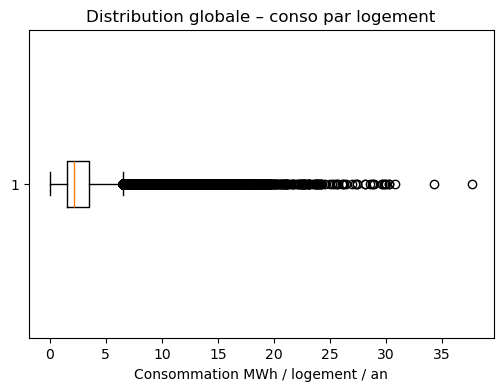

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df_plot["conso_mwh_par_logement"], vert=False)
plt.xlabel("Consommation MWh / logement / an")
plt.title("Distribution globale – conso par logement")
plt.show()


<Figure size 1000x600 with 0 Axes>

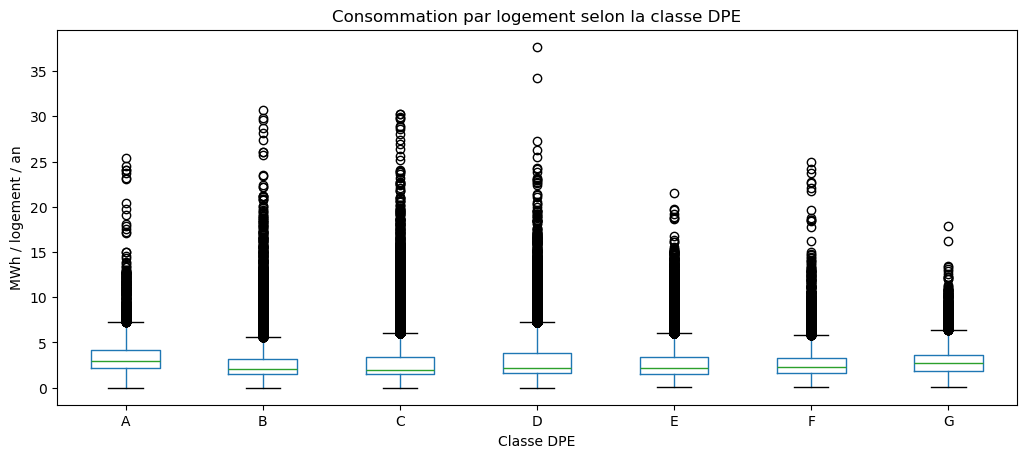

In [44]:
#juste visualisation des valeurs abérrantes de classe
plt.figure(figsize=(10,6))

df_plot.boxplot(
    column="conso_mwh_par_logement",
    by="etiquette_dpe_mode",
    grid=False
)

plt.title("Consommation par logement selon la classe DPE")
plt.suptitle("")  # enlève le titre automatique
plt.xlabel("Classe DPE")
plt.ylabel("MWh / logement / an")
plt.show()


In [45]:
con.execute("DESCRIBE enedis_dpe_clean_final").df()

column_name column_type null  \
0          consommation_annuelle_moyenne_de_la_commune_mwh      DOUBLE  YES   
1                                         code_departement     VARCHAR  YES   
2                                                 nom_iris     VARCHAR  YES   
3                                           numero_de_voie     VARCHAR  YES   
4                                                       _i      BIGINT  YES   
5                                                    annee     VARCHAR  YES   
6                                                code_iris     VARCHAR  YES   
7                                             code_commune     VARCHAR  YES   
8                                             type_de_voie     VARCHAR  YES   
9                                      nombre_de_logements      BIGINT  YES   
10                                               code_epci     VARCHAR  YES   
11                                        tri_des_adresses      BIGINT  YES   
12                                         libelle_de_voie     VARCHAR  YES   
13                                       segment_de_client     VARCHAR  YES   
14                                                   _rand      BIGINT  YES   
15                                             code_region     VARCHAR  YES   
16                                                 adresse     VARCHAR  YES   
17                                             nom_commune     VARCHAR  YES   
18  consommation_annuelle_moyenne_par_site_de_ladresse_mwh      DOUBLE  YES   
19            consommation_annuelle_totale_de_ladresse_mwh      DOUBLE  YES   
20                                                  _score      DOUBLE  YES   
21                                                     _id     VARCHAR  YES   
22                                    indice_de_repetition     VARCHAR  YES   
23                                            adresse_norm     VARCHAR  YES   
24                                                join_key     VARCHAR  YES   
25                                         identifiant_ban     VARCHAR  YES   
26                                         n_logements_dpe      BIGINT  YES   
27                                  annee_construction_med      DOUBLE  YES   
28                                   surface_habitable_med      DOUBLE  YES   
29                                      type_batiment_mode     VARCHAR  YES   
30                        qualite_isolation_enveloppe_mode     VARCHAR  YES   
31                             qualite_isolation_murs_mode     VARCHAR  YES   
32      qualite_isolation_plancher_haut_toit_terrasse_mode     VARCHAR  YES   
33                     qualite_isolation_plancher_bas_mode     VARCHAR  YES   
34                                      etiquette_dpe_mode     VARCHAR  YES   
35                                    n_etiquette_dpe_mode      BIGINT  YES   
36                                      etiquette_ges_mode     VARCHAR  YES   
37                                    n_etiquette_ges_mode      BIGINT  YES   
38                                  conso_mwh_par_logement      DOUBLE  YES   
39                                                      rn      BIGINT  YES   

     key default extra  
0   None    None  None  
1   None    None  None  
2   None    None  None  
3   None    None  None  
4   None    None  None  
5   None    None  None  
6   None    None  None  
7   None    None  None  
8   None    None  None  
9   None    None  None  
10  None    None  None  
11  None    None  None  
12  None    None  None  
13  None    None  None  
14  None    None  None  
15  None    None  None  
16  None    None  None  
17  None    None  None  
18  None    None  None  
19  None    None  None  
20  None    None  None  
21  None    None  None  
22  None    None  None  
23  None    None  None  
24  None    None  None  
25  None    None  None  
26  None    None  None  
27  None    None  None  
28  None    None  None  
29  None    None  None  
30  None    None  None  
31  Non

In [46]:
# table avec justes les colonnes nécésaires
con.execute("""
CREATE OR REPLACE VIEW enedis_dpe_analysis_ready AS
SELECT
  -- clés
  join_key,

  -- géographie
  code_commune,
  nom_commune,
  code_departement,
  code_region,

  -- temps
  annee,

  -- consommation
  consommation_annuelle_totale_de_ladresse_mwh,
  consommation_annuelle_moyenne_par_site_de_ladresse_mwh,
  nombre_de_logements,
  conso_mwh_par_logement,

  -- DPE structure
  type_batiment_mode,
  annee_construction_med,
  surface_habitable_med,

  -- isolation
  qualite_isolation_enveloppe_mode,
  qualite_isolation_murs_mode,
  qualite_isolation_plancher_haut_toit_terrasse_mode,
  qualite_isolation_plancher_bas_mode,

  -- classes énergie
  etiquette_dpe_mode,
  n_etiquette_dpe_mode,
  etiquette_ges_mode,
  n_etiquette_ges_mode,

  -- qualité DPE
  n_logements_dpe

FROM enedis_dpe_clean_final;
""")


In [47]:
con.execute("""
DESCRIBE enedis_dpe_analysis_ready
""").df()


column_name column_type null  \
0                                                 join_key     VARCHAR  YES   
1                                             code_commune     VARCHAR  YES   
2                                              nom_commune     VARCHAR  YES   
3                                         code_departement     VARCHAR  YES   
4                                              code_region     VARCHAR  YES   
5                                                    annee     VARCHAR  YES   
6             consommation_annuelle_totale_de_ladresse_mwh      DOUBLE  YES   
7   consommation_annuelle_moyenne_par_site_de_ladresse_mwh      DOUBLE  YES   
8                                      nombre_de_logements      BIGINT  YES   
9                                   conso_mwh_par_logement      DOUBLE  YES   
10                                      type_batiment_mode     VARCHAR  YES   
11                                  annee_construction_med      DOUBLE  YES   
12                                   surface_habitable_med      DOUBLE  YES   
13                        qualite_isolation_enveloppe_mode     VARCHAR  YES   
14                             qualite_isolation_murs_mode     VARCHAR  YES   
15      qualite_isolation_plancher_haut_toit_terrasse_mode     VARCHAR  YES   
16                     qualite_isolation_plancher_bas_mode     VARCHAR  YES   
17                                      etiquette_dpe_mode     VARCHAR  YES   
18                                    n_etiquette_dpe_mode      BIGINT  YES   
19                                      etiquette_ges_mode     VARCHAR  YES   
20                                    n_etiquette_ges_mode      BIGINT  YES   
21                                         n_logements_dpe      BIGINT  YES   

     key default extra  
0   None    None  None  
1   None    None  None  
2   None    None  None  
3   None    None  None  
4   None    None  None  
5   None    None  None  
6   None    None  None  
7   None    None  None  
8   None    None  None  
9   None    None  None  
10  None    None  None  
11  None    None  None  
12  None    None  None  
13  None    None  None  
14  None    None  None  
15  None    None  None  
16  None    None  None  
17  None    None  None  
18  None    None  None  
19  None    None  None  
20  None    None  None  
21  None    None  None

In [48]:
con.execute("""
SELECT COUNT(*) AS n_lignes
FROM enedis_dpe_analysis_ready
""").df()


n_lignes
0   1119319

Après la jointure des bases ENEDIS et DPE, un nettoyage ciblé a été effectué afin de conserver uniquement les variables pertinentes pour l’analyse énergétique. Les colonnes techniques, redondantes ou non exploitables analytiquement ont été supprimées, aboutissant à un jeu de données final cohérent, interprétable et adapté à l’analyse statistique et à la modélisation.

*création du Dataframe*, **Pandas**

In [49]:
df = con.execute("""
SELECT *
FROM enedis_dpe_analysis_ready
""").df()

print(df.shape)
df.head()


(1119319, 22)


join_key code_commune      nom_commune code_departement  \
0  1 ALLEE ALBERT SAMAIN|59350        59350            Lille               59   
1  1 ALLEE AMBROISE PARE|26198        26198       MONTELIMAR               26   
2  1 ALLEE AMBROISE PARE|26198        26198       Montélimar               26   
3   1 ALLEE ANDRE AMPERE|93064        93064  Rosny-sous-Bois               93   
4    1 ALLEE ANITA CONTI|93051        93051   Noisy-le-Grand               93   

  code_region annee  consommation_annuelle_totale_de_ladresse_mwh  \
0          32  2021                                        20.604   
1          84  2018                                        60.225   
2          84  2019                                        63.339   
3          11  2020                                        52.559   
4          11  2021                                        59.264   

   consommation_annuelle_moyenne_par_site_de_ladresse_mwh  \
0                                                   2.060   
1                                                   1.544   
2                                                   1.624   
3                                                   3.504   
4                                                   1.912   

   nombre_de_logements  conso_mwh_par_logement type_batiment_mode  \
0                   10                2.060400        appartement   
1                   39                1.544231        appartement   
2                   39                1.624077        appartement   
3                   15                3.503933        appartement   
4                   31                1.911742        appartement   

   annee_construction_med  surface_habitable_med  \
0                  1965.0                   58.8   
1                  1966.5                   71.0   
2                  1966.5                   71.0   
3                     NaN                   34.0   
4                  2013.0                   51.3   

  qualite_isolation_enveloppe_mode qualite_isolation_murs_mode  \
0                     insuffisante                insuffisante   
1                     insuffisante                insuffisante   
2                     insuffisante                insuffisante   
3                     insuffisante                insuffisante   
4                            bonne                insuffisante   

  qualite_isolation_plancher_haut_toit_terrasse_mode  \
0                                               None   
1                                            moyenne   
2                                            moyenne   
3                                               None   
4                                               None   

  qualite_isolation_plancher_bas_mode etiquette_dpe_mode  \
0                               bonne                  E   
1                               bonne                  E   
2                               bonne                  E   
3                          très bonne                  E   
4                          très bonne                  C   

   n_etiquette_dpe_mode etiquette_ges_mode  n_etiquette_ges_mode  \
0                     4                  E                     3   
1                    44                  E                    44   
2                    44                  E                    44   
3                     1                  C                     1   
4                     8                  C                     8   

   n_logements_dpe  
0                4  
1               57  
2               57  
3                1  
4                8

*Plus de nettoyage avec Pandas*

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119319 entries, 0 to 1119318
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count    Dtype  
---  ------                                                  --------------    -----  
 0   join_key                                                1119319 non-null  object 
 1   code_commune                                            1119319 non-null  object 
 2   nom_commune                                             1119274 non-null  object 
 3   code_departement                                        1119318 non-null  object 
 4   code_region                                             1119318 non-null  object 
 5   annee                                                   1119319 non-null  object 
 6   consommation_annuelle_totale_de_ladresse_mwh            1119319 non-null  float64
 7   consommation_annuelle_moyenne_par_site_de_ladresse_mwh  1119319 non-null  float64
 8   nombre_de_lo

In [51]:
! pip install missingno 

In [52]:
import missingno as msno

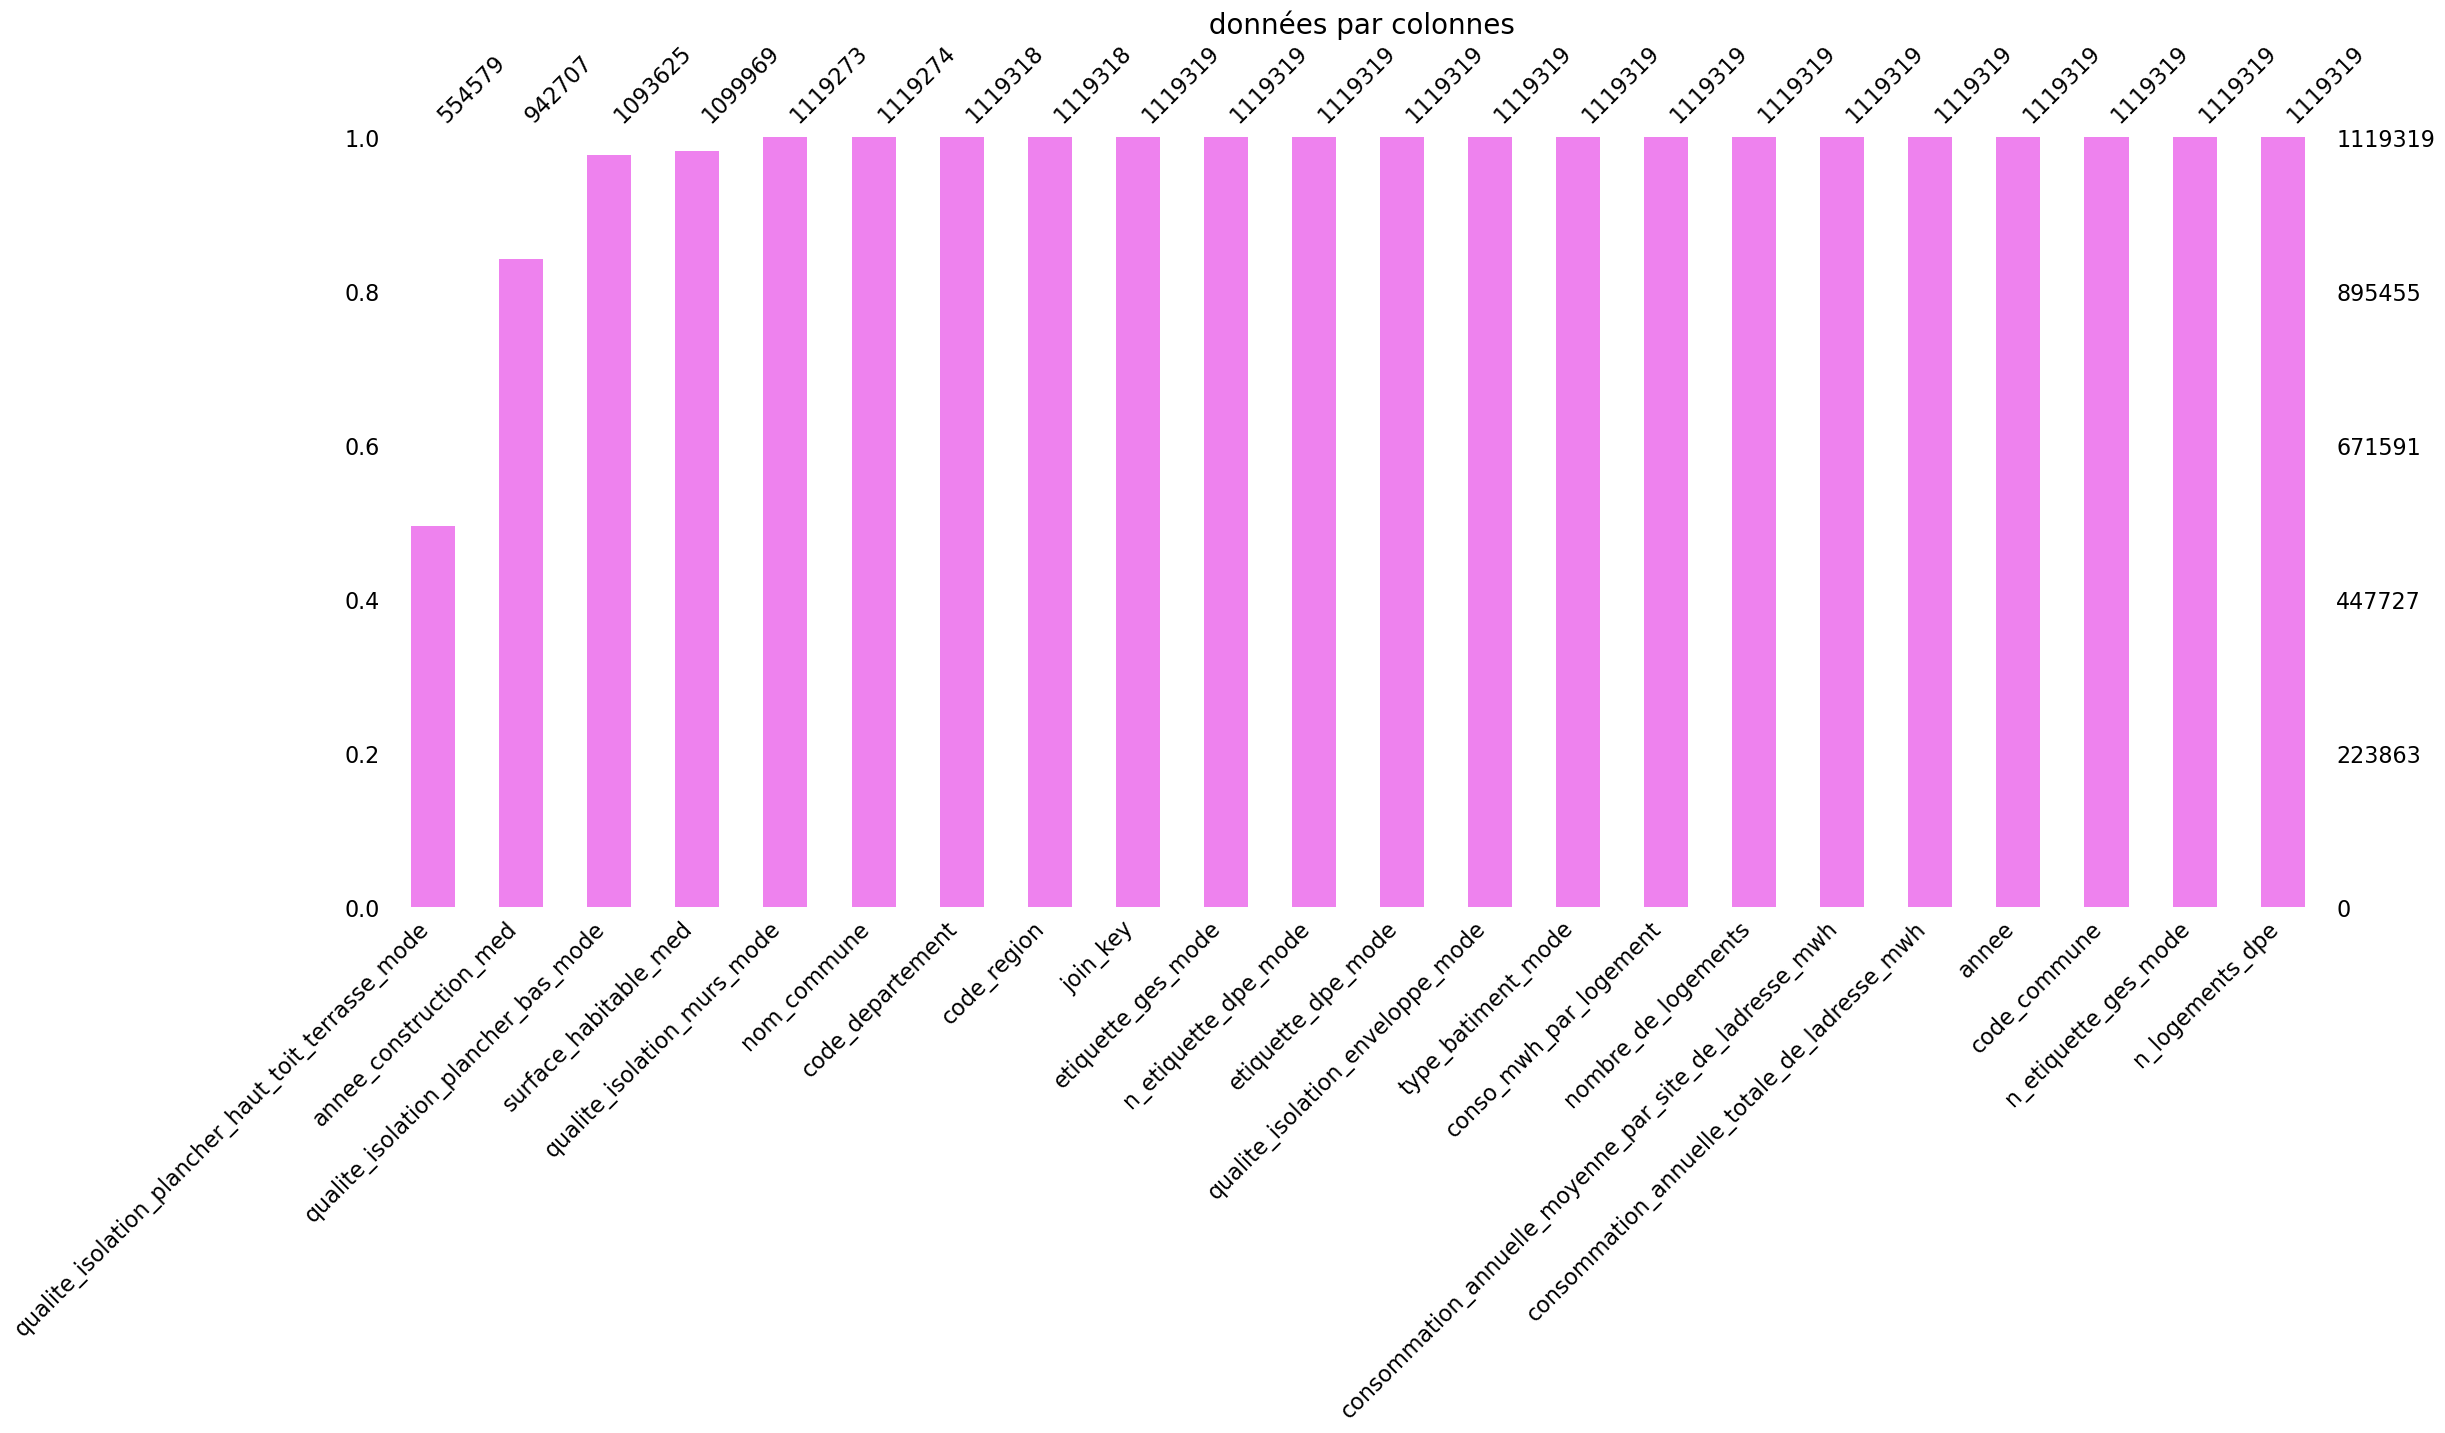

In [53]:
msno.bar(df, color="violet", sort="ascending")
plt.title(" données par colonnes", fontsize=20)
plt.show()

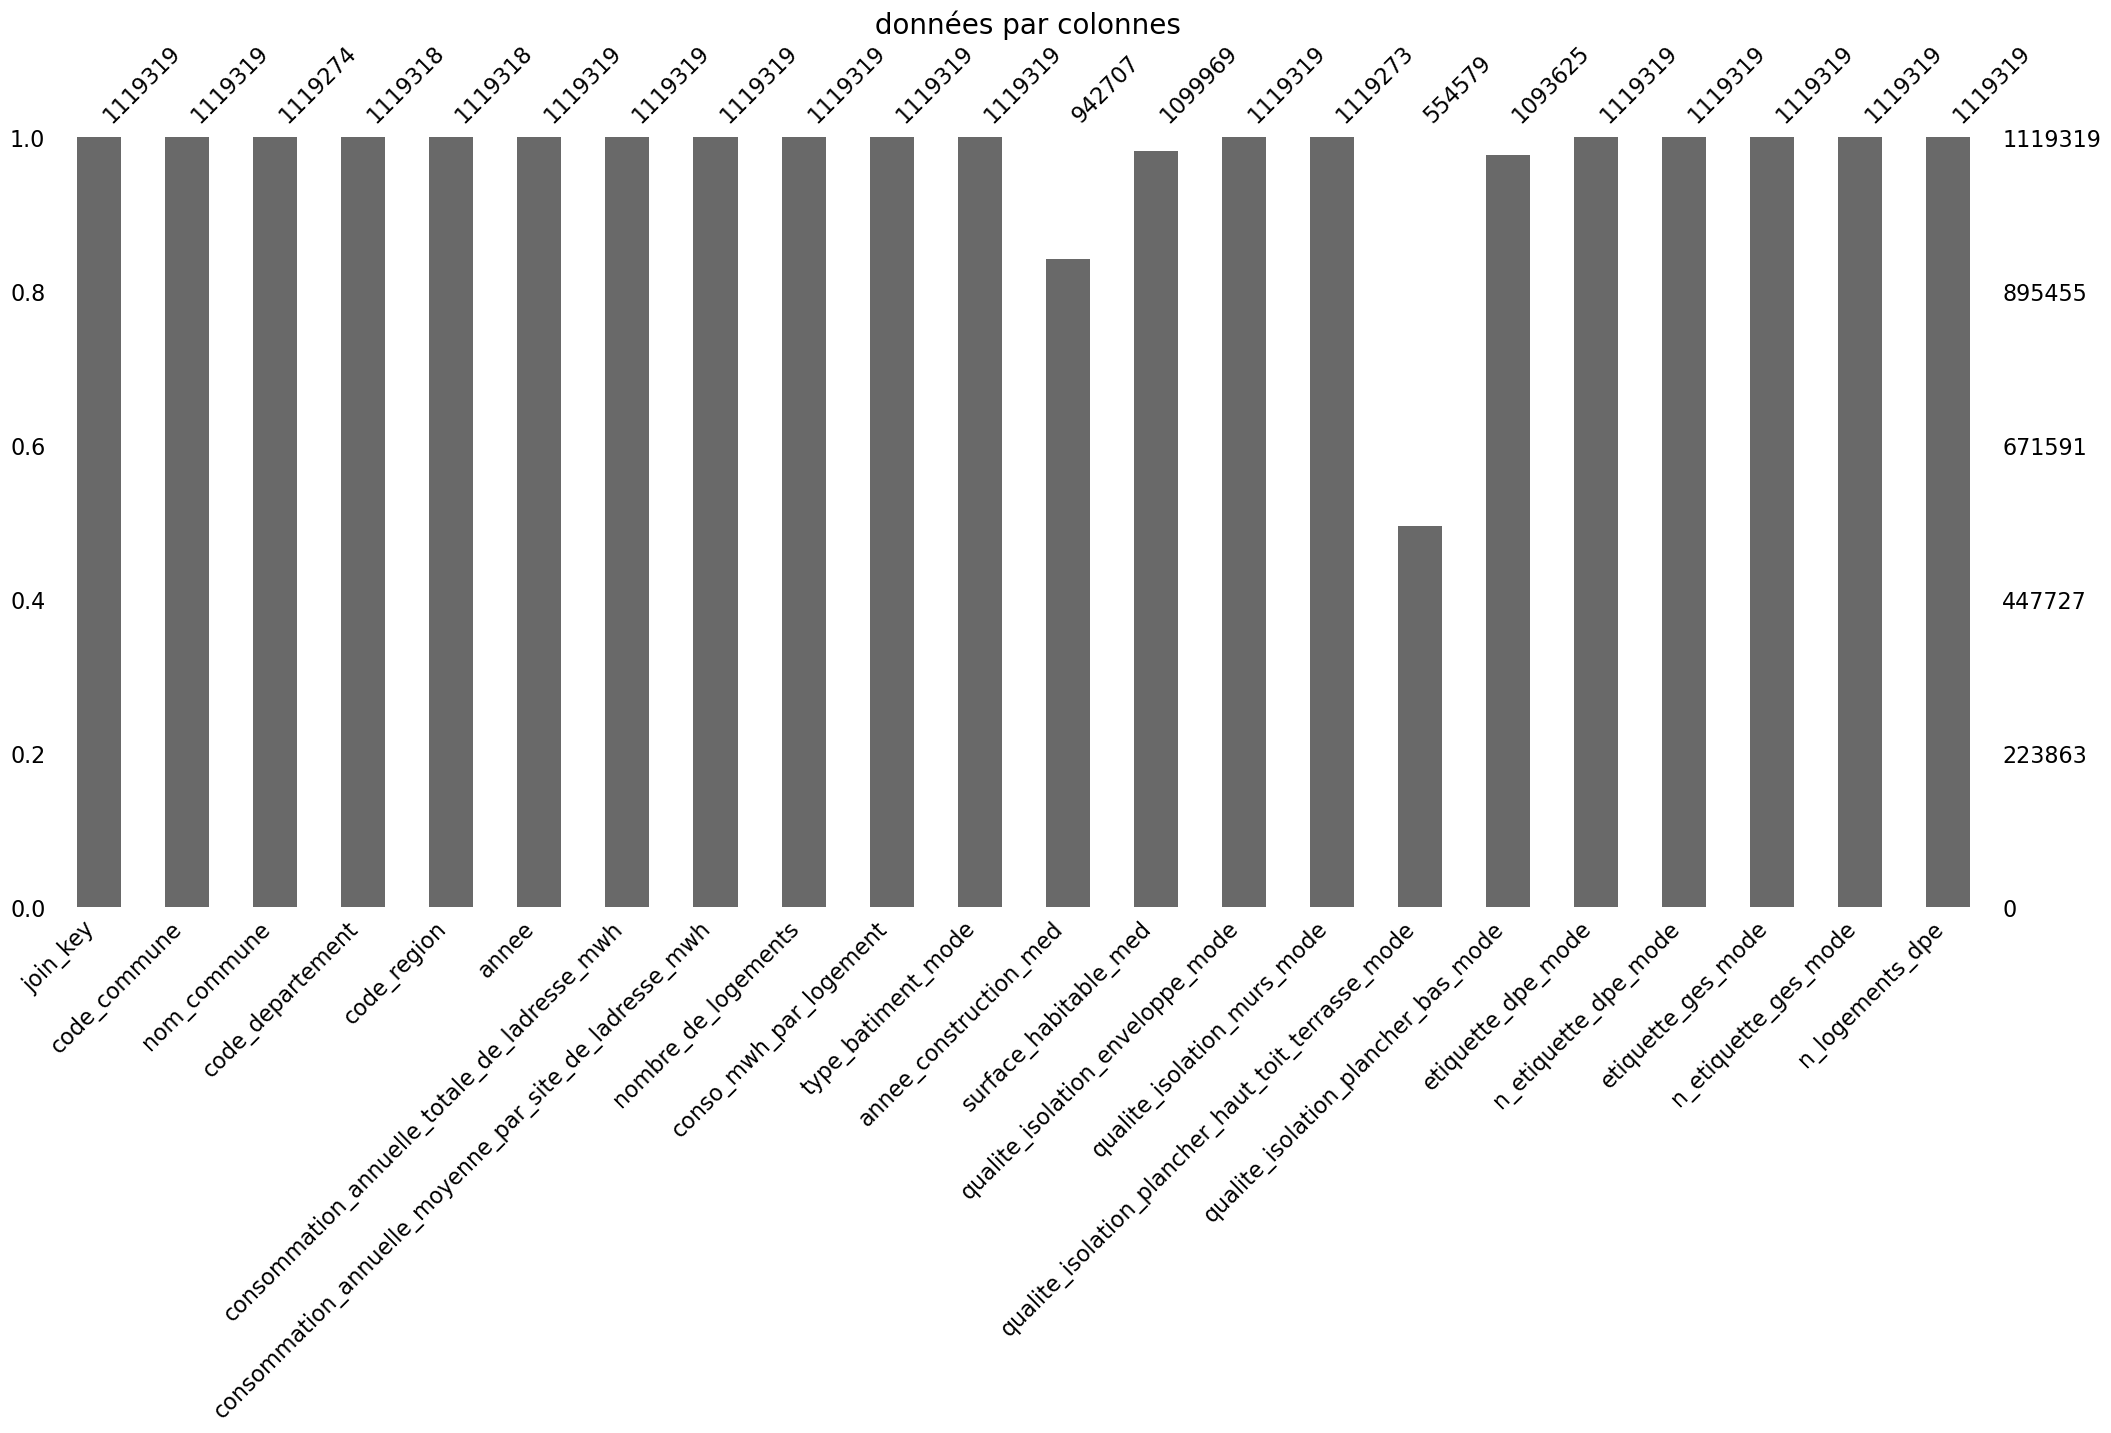

In [54]:
msno.bar(df)
plt.title(" données par colonnes", fontsize=20)
plt.show()
# données sans données manquantes

In [55]:
df.isnull().sum()


join_key                                                       0
code_commune                                                   0
nom_commune                                                   45
code_departement                                               1
code_region                                                    1
annee                                                          0
consommation_annuelle_totale_de_ladresse_mwh                   0
consommation_annuelle_moyenne_par_site_de_ladresse_mwh         0
nombre_de_logements                                            0
conso_mwh_par_logement                                         0
type_batiment_mode                                             0
annee_construction_med                                    176612
surface_habitable_med                                      19350
qualite_isolation_enveloppe_mode                               0
qualite_isolation_murs_mode                                   46
qualite_isolation_planche

In [56]:
df.shape


(1119319, 22)

In [ ]:
#df["qualite_isolation_enveloppe_mode"] = df["qualite_isolation_enveloppe_mode"].fillna("Inconnue")
#df["qualite_isolation_plancher_haut_toit_terrasse_mode"] = df["qualite_isolation_plancher_haut_toit_terrasse_mode"].fillna("Inconnue")
#df["qualite_isolation_murs_mode"] = df["qualite_isolation_murs_mode"].fillna("Inconnue")
#df["qualite_isolation_plancher_bas_mode "] = df["qualite_isolation_plancher_bas_mode "].fillna("Inconnue")
# tester pour voir si j'airais des résultats differentes 

In [57]:
# Eliminer les null
df_clean = df.dropna()

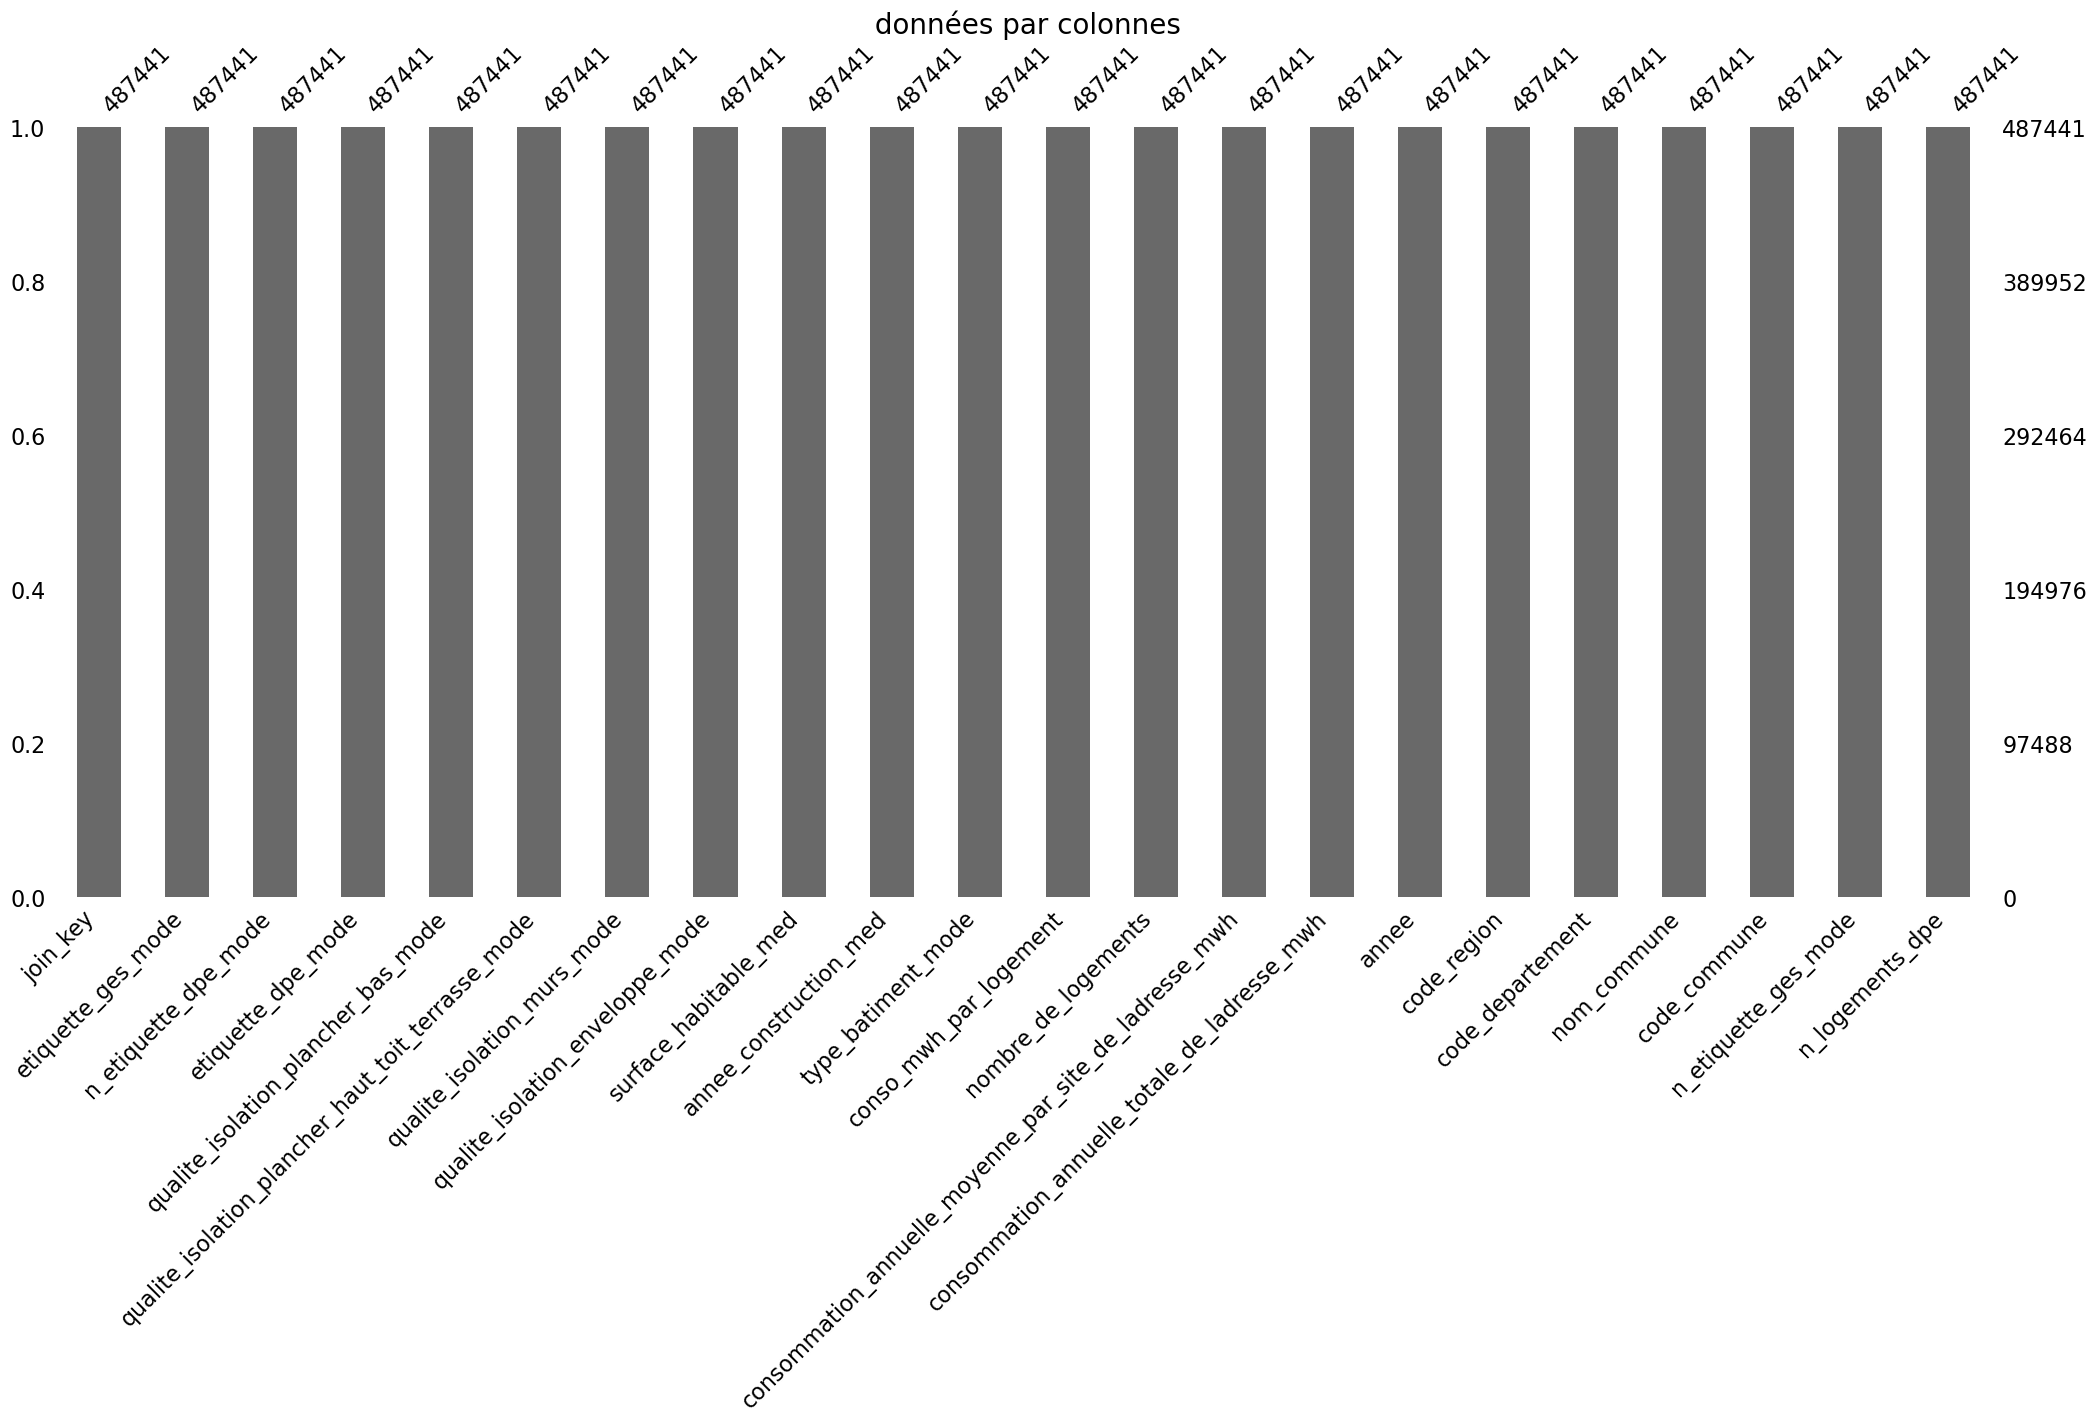

In [58]:
msno.bar(df_clean, sort="ascending")
plt.title(" données par colonnes", fontsize=20)
plt.show()

In [59]:
df_clean.shape

(487441, 22)

In [60]:
df_clean = df_clean.drop_duplicates()


In [61]:
df_clean.shape

(487441, 22)

**4️⃣ Analyses & visualisations → Pandas / Matplotlib / Seaborn**

In [62]:
df_clean.groupby("etiquette_dpe_mode")["conso_mwh_par_logement"].mean()


etiquette_dpe_mode
A    3.317510
B    2.576979
C    2.620155
D    2.843563
E    2.513442
F    2.382967
G    2.699820
Name: conso_mwh_par_logement, dtype: float64

<Axes: xlabel='etiquette_dpe_mode', ylabel='conso_mwh_par_logement'>

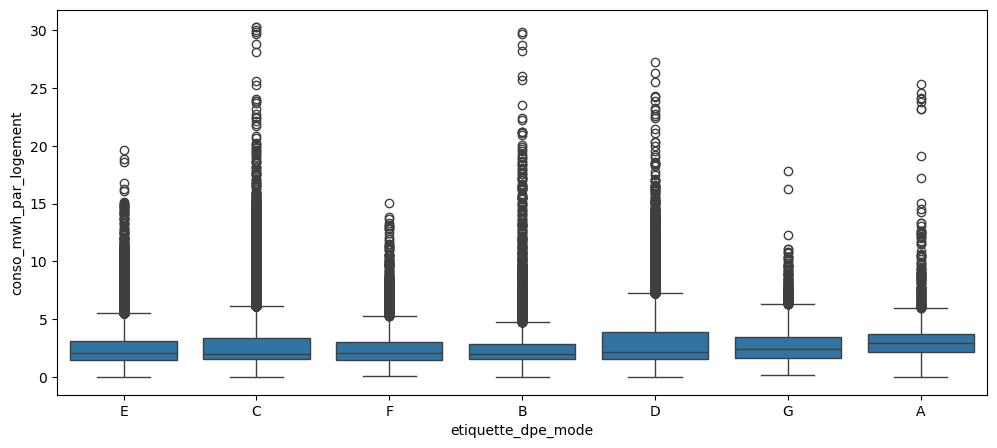

In [63]:
import seaborn as sns
sns.boxplot(data=df_clean, x="etiquette_dpe_mode", y="conso_mwh_par_logement")


In [64]:
# separer les outlier
q_low = df_clean["conso_mwh_par_logement"].quantile(0.01)
q_high = df_clean["conso_mwh_par_logement"].quantile(0.99)

df_q = df_clean[
    (df_clean["conso_mwh_par_logement"] >= q_low) &
    (df_clean["conso_mwh_par_logement"] <= q_high)
]


**PCA pour seulement DPE A & B**

In [65]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477691 entries, 1 to 1119318
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   join_key                                                477691 non-null  object 
 1   code_commune                                            477691 non-null  object 
 2   nom_commune                                             477691 non-null  object 
 3   code_departement                                        477691 non-null  object 
 4   code_region                                             477691 non-null  object 
 5   annee                                                   477691 non-null  object 
 6   consommation_annuelle_totale_de_ladresse_mwh            477691 non-null  float64
 7   consommation_annuelle_moyenne_par_site_de_ladresse_mwh  477691 non-null  float64
 8   nombre_de_logements         

In [66]:
df_ab = df_q[df_q["etiquette_dpe_mode"].isin(["A", "B"])].copy()

In [67]:
#dataframe  PCA 
pca_cols = [
   
     "annee_construction_med",
     "surface_habitable_med",
     "conso_mwh_par_logement",
     "etiquette_dpe_mode"
]

df_pca = df_ab[pca_cols].dropna().copy()


In [68]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11552 entries, 16 to 1119318
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annee_construction_med  11552 non-null  float64
 1   surface_habitable_med   11552 non-null  float64
 2   conso_mwh_par_logement  11552 non-null  float64
 3   etiquette_dpe_mode      11552 non-null  object 
dtypes: float64(3), object(1)
memory usage: 451.2+ KB


*Séparer X (PCA) et Y (étiquette DPE)*

In [69]:
X = df_pca.drop(columns =["etiquette_dpe_mode"])
y = df_pca["etiquette_dpe_mode"]

In [70]:
X

annee_construction_med  surface_habitable_med  conso_mwh_par_logement
16                       1973.0                  73.95                2.406744
17                       1973.0                  73.95                2.108233
18                       1973.0                  73.95                2.206163
189                      2019.0                  48.70                3.088717
578                      2019.0                  41.60                2.799333
861                      2017.0                  46.10                2.372067
892                      2015.0                  72.20                1.509722
893                      2015.0                  72.20                1.537053
1024                     2011.0                  63.00                2.126632
1025                     2011.0                  63.00                1.892000
1159                     1974.0                  54.00                1.392318
1686                     2017.0                  67.60                3.456550
1687                     2017.0                  67.60                2.973524
1688                     2017.0                  67.60                2.565095
2285                     2015.0                  60.10                2.162750
2648                     1967.0                  71.00                1.910800
2683                     2005.0                  60.70                2.099033
2684                     2005.0                  60.70                1.988033
2685                     2005.0                  60.70                2.041900
2766                     1968.0                  63.00                1.563273
2949                     2016.0                  62.50                3.870071
3012                     2011.0                  47.60                1.621741
3014                     2017.0                  40.50                1.794545
3248                     2015.5                  65.30                1.609733
3249                     2015.5                  65.30                1.640533
3256                     2017.0                  63.35                1.830059
3257                     2017.0                  39.90                1.450821
3261                     2017.0                  69.80                1.211545
3262                     2017.0                  69.80                1.290818
3456                     2020.0                  58.90                1.830500
3457                     2020.0                  58.90                1.883679
3458                     2020.0                  58.90                1.798321
3619                     2019.0                  41.80                1.935471
3657                     2015.0                  58.60                2.188577
3915                     2012.0                  82.35                1.722424
3981                     2014.0                  62.05                3.087829
4036                     2016.0                  63.80                1.244438
4037                     2016.0                  63.80                1.100594
4038                     2016.0                  63.80                1.159063
4093                     1971.0                  63.20                1.732526
4337                     2014.0                  40.80                3.429048
4338                     2014.0                  40.80                2.984571
4339                     2014.0                  40.80                2.812854
4389                     2019.0                  85.00                1.644314
4390                     2019.0                  85.00                1.654410
4391                     2019.0                  85.00                1.677981
5036                     1975.0                  70.00                2.366312
5037                     1975.0                  70.00                2.284594
5051                     1974.0                  65.00                4.219208
5229                     2016.0                  74.00     

*Standardisation (OBLIGATOIRE avant PCA)*

In [71]:
#AVEC FANALYSIS on n'a pas deboin de StandarScaler, ça se fait automatiquement

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
# mettre dan un dataframe
#X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [72]:
#X = df_pca.drop(columns=["etiquette_dpe_mode"]).reset_index(drop=True)
#y = df_pca["etiquette_dpe_mode"].reset_index(drop=True)


In [73]:
print("TYPE:", type(X))
print("SHAPE:", X.shape)
print("HEAD:\n", X.head())
print("COLUMNS:", X.columns)


TYPE: <class 'pandas.core.frame.DataFrame'>
SHAPE: (11552, 3)
HEAD:
      annee_construction_med  surface_habitable_med  conso_mwh_par_logement
16                   1973.0                  73.95                2.406744
17                   1973.0                  73.95                2.108233
18                   1973.0                  73.95                2.206163
189                  2019.0                  48.70                3.088717
578                  2019.0                  41.60                2.799333
COLUMNS: Index(['annee_construction_med', 'surface_habitable_med',
       'conso_mwh_par_logement'],
      dtype='object')


In [74]:
pip install fanalysis


Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
from fanalysis.pca import PCA
%matplotlib inline

In [76]:
X_np = X.values   # convertir a numpy array limpio

pca = PCA(std_unit=True)
pca.fit(X_np)


PCA()

In [77]:
print(pca.eig_)

[[  1.14534868   0.97516356   0.87948776]
 [ 38.17828934  32.50545198  29.31625869]
 [ 38.17828934  70.68374131 100.        ]]


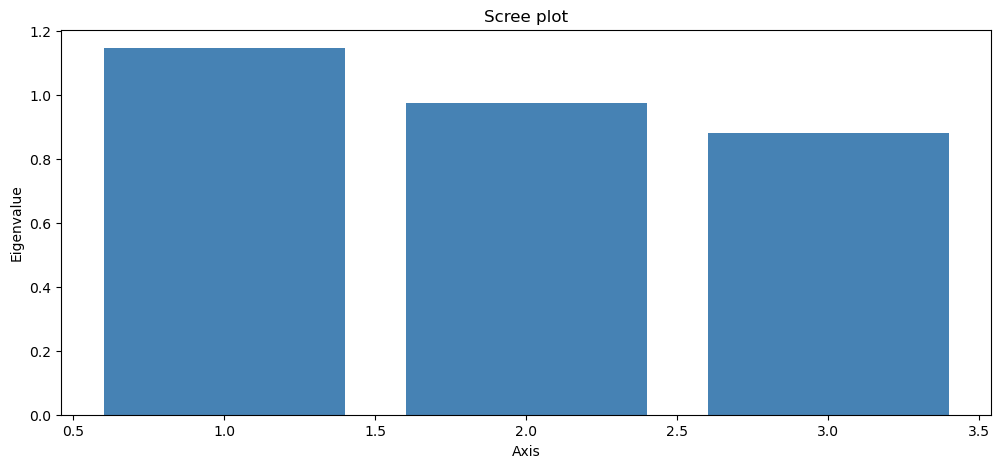

In [78]:
pca.plot_eigenvalues()

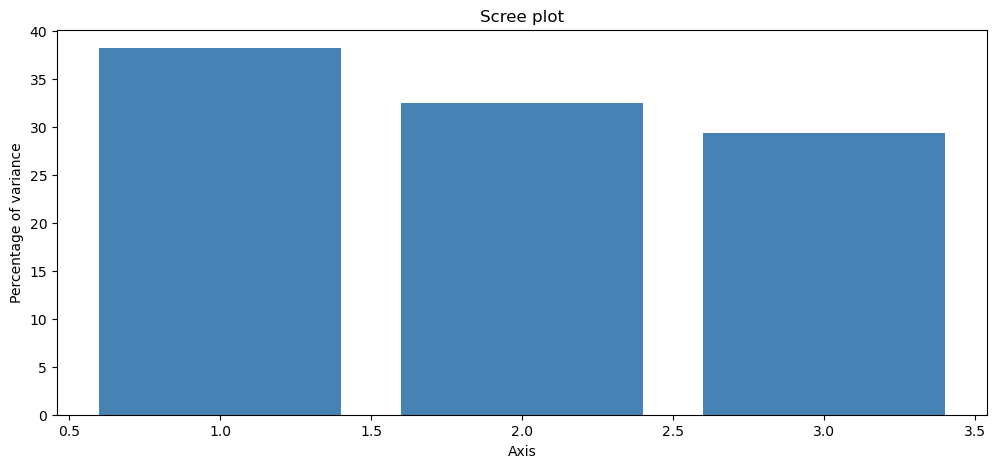

In [79]:
pca.plot_eigenvalues(type="percentage")

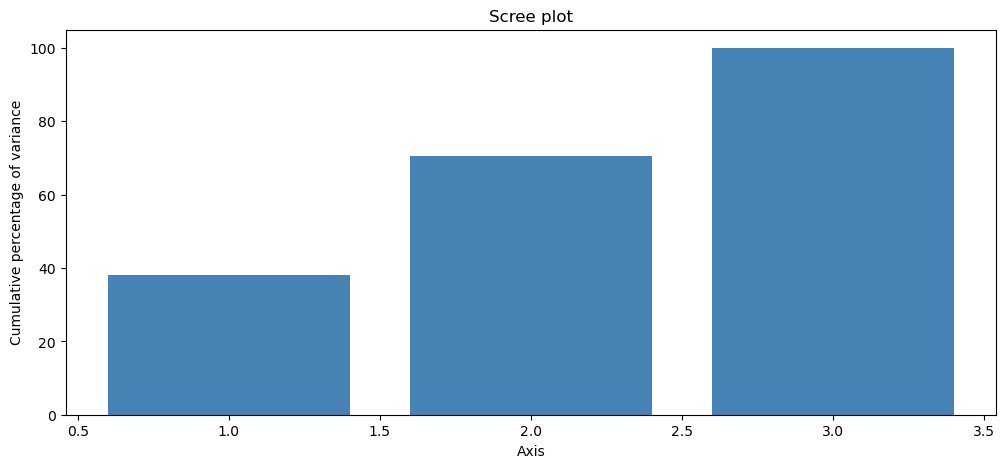

In [80]:
pca.plot_eigenvalues(type="cumulative")

In [81]:
df_rows = pca.row_topandas()

In [82]:
print(df_rows)

          row_coord_dim1  row_coord_dim2  row_coord_dim3  row_contrib_dim1  \
row0           -0.972647        0.704183        0.910683      7.150157e-03   
row1           -0.872815        0.921407        0.862770      5.757709e-03   
row2           -0.905566        0.850144        0.878489      6.197913e-03   
row3            0.362632       -0.782589       -0.213122      9.938877e-04   
row4            0.513387       -0.583791       -0.200534      1.992027e-03   
row5            0.562443       -0.224161       -0.243782      2.390902e-03   
row6            0.592793        0.487925       -0.536464      2.655898e-03   
row7            0.583653        0.468037       -0.532078      2.574628e-03   
row8            0.337168        0.106221       -0.235452      8.592075e-04   
row9            0.415636        0.276961       -0.273112      1.305666e-03   
row10          -0.451912        1.388637        0.882369      1.543525e-03   
row11           0.036308       -0.977644       -0.248485      9.

In [83]:
# Coordonnées des points lignes
print(pca.row_coord_)

[[-0.97264697  0.70418296  0.91068346]
 [-0.87281521  0.92140734  0.86277023]
 [-0.90556619  0.85014434  0.87848873]
 ...
 [ 0.6604141   0.59512984 -0.68918759]
 [ 0.99250547  0.53329492 -0.40623793]
 [ 0.5195435  -0.4958252  -0.1792447 ]]


In [84]:
# Contributions des points lignes
print(pca.row_contrib_)

[[0.00715016 0.00440186 0.00816296]
 [0.00575771 0.00753648 0.00732661]
 [0.00619791 0.0064158  0.00759601]
 ...
 [0.00329638 0.00314405 0.00467507]
 [0.00744511 0.00252464 0.00162433]
 [0.00204009 0.00218234 0.00031623]]


In [85]:
# Cos2 des points lignes
print(pca.row_cos2_)

[[0.41652742 0.21832534 0.36514724]
 [0.32346127 0.36047986 0.31605887]
 [0.35430403 0.31226336 0.33343261]
 ...
 [0.34469673 0.27991614 0.37538713]
 [0.68669726 0.19825968 0.11504306]
 [0.49265752 0.44870249 0.05863999]]


In [86]:
df_cols = pca.col_topandas()

In [87]:
print(df_cols)

      col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
col0        0.665518       -0.424764       -0.613727         38.670708   
col1       -0.714437        0.143930       -0.684737         44.564559   
col2       -0.438195       -0.879786        0.184289         16.764733   

      col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
col0         18.502003         42.827289       0.442914       0.180425   
col1          2.124354         53.311087       0.510420       0.020716   
col2         79.373643          3.861624       0.192015       0.774023   

      col_cos2_dim3  
col0       0.376661  
col1       0.468864  
col2       0.033963  


In [88]:
# Coordonnées des points lignes
print(pca.row_coord_)

[[-0.97264697  0.70418296  0.91068346]
 [-0.87281521  0.92140734  0.86277023]
 [-0.90556619  0.85014434  0.87848873]
 ...
 [ 0.6604141   0.59512984 -0.68918759]
 [ 0.99250547  0.53329492 -0.40623793]
 [ 0.5195435  -0.4958252  -0.1792447 ]]


In [89]:
# Contributions des points lignes
print(pca.row_contrib_)

[[0.00715016 0.00440186 0.00816296]
 [0.00575771 0.00753648 0.00732661]
 [0.00619791 0.0064158  0.00759601]
 ...
 [0.00329638 0.00314405 0.00467507]
 [0.00744511 0.00252464 0.00162433]
 [0.00204009 0.00218234 0.00031623]]


In [90]:
# Cos2 des points lignes
print(pca.row_cos2_)

[[0.41652742 0.21832534 0.36514724]
 [0.32346127 0.36047986 0.31605887]
 [0.35430403 0.31226336 0.33343261]
 ...
 [0.34469673 0.27991614 0.37538713]
 [0.68669726 0.19825968 0.11504306]
 [0.49265752 0.44870249 0.05863999]]


In [91]:
df_cols = pca.col_topandas()
print(df_cols)

      col_coord_dim1  col_coord_dim2  col_coord_dim3  col_contrib_dim1  \
col0        0.665518       -0.424764       -0.613727         38.670708   
col1       -0.714437        0.143930       -0.684737         44.564559   
col2       -0.438195       -0.879786        0.184289         16.764733   

      col_contrib_dim2  col_contrib_dim3  col_cos2_dim1  col_cos2_dim2  \
col0         18.502003         42.827289       0.442914       0.180425   
col1          2.124354         53.311087       0.510420       0.020716   
col2         79.373643          3.861624       0.192015       0.774023   

      col_cos2_dim3  
col0       0.376661  
col1       0.468864  
col2       0.033963  


In [92]:
# Coordonnées des points colonnes
print(pca.col_coord_)

[[ 0.66551818 -0.42476439 -0.61372695]
 [-0.71443656  0.14393027 -0.6847368 ]
 [-0.43819475 -0.87978568  0.1842892 ]]


In [93]:
# Contributions des points colonnes
print(pca.col_contrib_)

[[38.67070817 18.50200293 42.8272889 ]
 [44.5645593   2.12435361 53.3110871 ]
 [16.76473253 79.37364347  3.861624  ]]


In [94]:
# Cos2 des points colonnes
print(pca.col_cos2_)

[[0.44291445 0.18042479 0.37666076]
 [0.51041959 0.02071592 0.46886449]
 [0.19201464 0.77402285 0.03396251]]


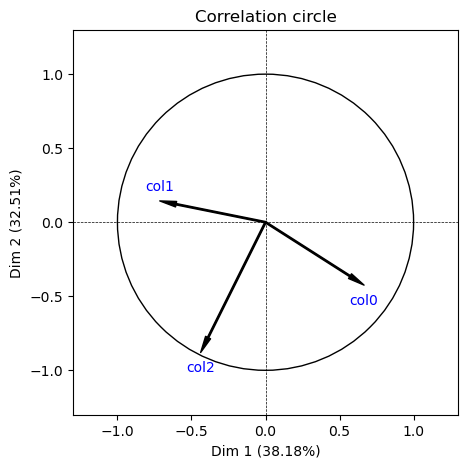

In [95]:
# Cercle des corrélations
# Les paramètres de la méthode correlation circle indiquent que ce sont les axes 1 et 2 qui sont ici représentés
pca.correlation_circle(num_x_axis=1, num_y_axis=2)

<Figure size 1000x800 with 0 Axes>

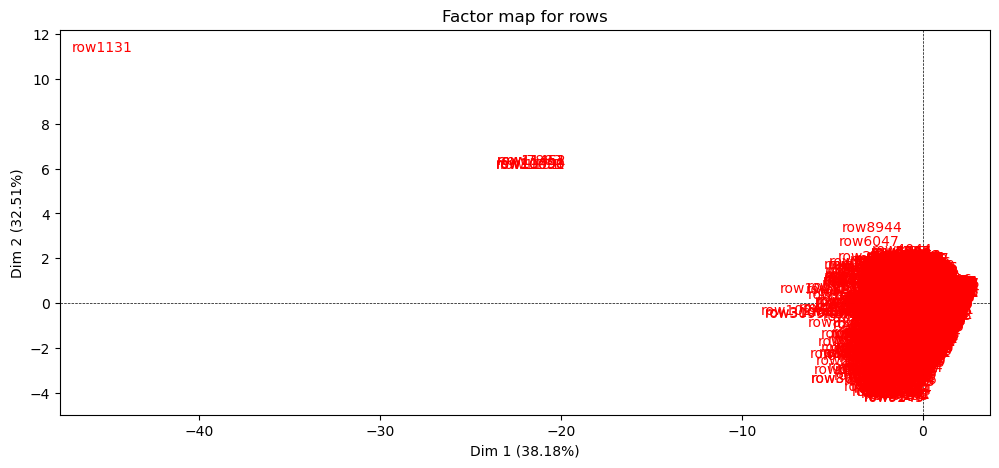

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))   # ancho=10, alto=8 (puedes ajustarlo)
pca.mapping_row(num_x_axis=1, num_y_axis=2)
plt.show()


**La PCA n’a pas été retenue car le nombre limité de variables quantitatives ne permettait pas une réduction dimensionnelle pertinente.**


**FAMD**



***FAMD** (Factor Analysis of Mixed Data) est une méthode exploratoire qui combine :

une logique PCA pour les variables numériques (variance),

une logique MCA pour les variables catégorielles (modalités),
afin d’analyser ensemble des variables mixtes (num + cat) et voir quelles variables contribuent le plus aux axes.

👉 Elle ne “prédit” pas A/B. Elle sert à comprendre la structure et voir quelles variables portent le plus d’information.*

In [97]:
pip install prince pandas numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [98]:
pip install --upgrade prince


Note: you may need to restart the kernel to use updated packages.


In [99]:
import pandas as pd
import numpy as np

# df_q = ton dataframe nettoyé (outliers déjà gérés si tu veux)
df_ab = df_q[df_q["etiquette_dpe_mode"].isin(["A", "B"])].copy()

num_cols = [
    "annee_construction_med",
    "surface_habitable_med",
    "conso_mwh_par_logement"
]

cat_cols = [
    "type_batiment_mode",
    "qualite_isolation_enveloppe_mode",
    "qualite_isolation_murs_mode",
    "qualite_isolation_plancher_haut_toit_terrasse_mode",
    "qualite_isolation_plancher_bas_mode"
]

# si certaines colonnes cat ont des NaN : tu peux garder "Inconnue" (recommandé)
for c in cat_cols:
    df_ab[c] = df_ab[c].fillna("Inconnue")

# dataset FAMD
df_famd = df_ab[num_cols + cat_cols].dropna(subset=num_cols).copy()
print(df_famd.shape)


(11552, 8)


In [100]:
import prince

famd = prince.FAMD(
    n_components=5,     # tu peux mettre 2, 3, 5…
    n_iter=3,
    copy=True,
    check_input=True,
    engine="sklearn",
    random_state=42
)

famd = famd.fit(df_famd)
coords = famd.transform(df_famd)   # coordonnées des individus
coords.head()


component         0         1         2         3         4
16        -0.350248 -1.087353  0.981618  0.576810 -2.674188
17        -0.362569 -1.107231  0.956584  0.614000 -2.700862
18        -0.358527 -1.100710  0.964797  0.601799 -2.692111
189       -1.796267 -0.699025  0.722469 -0.805568  0.050057
578       -1.810623 -0.718499  0.696499 -0.767190  0.023872

In [101]:
eig = famd.eigenvalues_
inertia = eig / eig.sum()
print("Eigenvalues:", eig)
print("Inertie expliquée:", inertia)
print("Inertie cumulée:", np.cumsum(inertia))

Eigenvalues: [4.95443634 3.88703017 3.26444715 2.97041082 2.76560806]
Inertie expliquée: [0.27768496 0.21785926 0.18296489 0.16648481 0.15500608]
Inertie cumulée: [0.27768496 0.49554422 0.6785091  0.84499392 1.        ]


*Les deux premières dimensions concentrent près de 50 % de l’information totale, ce qui permet une lecture synthétique des facteurs principaux expliquant la performance énergétique des logements A et B.*

In [102]:
famd = prince.FAMD(n_components=5, random_state=42).fit(df_famd)
coords = famd.transform(df_famd)  # colonnes = dimensions 0..K-1


In [103]:
num_cols = ["annee_construction_med","surface_habitable_med","conso_mwh_par_logement"]

imp_num = {}
for v in num_cols:
    corrs = coords.apply(lambda dim: np.corrcoef(df_famd[v].values, dim.values)[0, 1])
    imp_num[v] = float((corrs**2).sum())

imp_num = pd.Series(imp_num).sort_values(ascending=False)
imp_num


annee_construction_med    0.401735
conso_mwh_par_logement    0.178529
surface_habitable_med     0.008341
dtype: float64

In [104]:
cat_cols = [
    "type_batiment_mode",
    "qualite_isolation_enveloppe_mode",
    "qualite_isolation_murs_mode",
    "qualite_isolation_plancher_haut_toit_terrasse_mode",
    "qualite_isolation_plancher_bas_mode"
]

def eta2(cat_series, y):
    s = cat_series.astype("category")
    y = pd.Series(y).astype(float)

    y_mean = y.mean()
    ss_total = ((y - y_mean)**2).sum()
    if ss_total == 0:
        return 0.0

    ss_between = 0.0
    for k in s.cat.categories:
        grp = y[s == k]
        if len(grp) == 0:
            continue
        ss_between += len(grp) * (grp.mean() - y_mean)**2

    return float(ss_between / ss_total)

imp_cat = {}
for v in cat_cols:
    score = 0.0
    for dim in coords.columns:
        score += eta2(df_famd[v], coords[dim])
    imp_cat[v] = score

imp_cat = pd.Series(imp_cat).sort_values(ascending=False)
imp_cat



qualite_isolation_murs_mode                           1.732255
qualite_isolation_plancher_haut_toit_terrasse_mode    1.724136
qualite_isolation_plancher_bas_mode                   1.516329
qualite_isolation_enveloppe_mode                      1.230515
type_batiment_mode                                    0.698991
dtype: float64

In [105]:
imp_all = pd.concat([imp_num, imp_cat]).sort_values(ascending=False)
imp_all.head(15)


qualite_isolation_murs_mode                           1.732255
qualite_isolation_plancher_haut_toit_terrasse_mode    1.724136
qualite_isolation_plancher_bas_mode                   1.516329
qualite_isolation_enveloppe_mode                      1.230515
type_batiment_mode                                    0.698991
annee_construction_med                                0.401735
conso_mwh_par_logement                                0.178529
surface_habitable_med                                 0.008341
dtype: float64

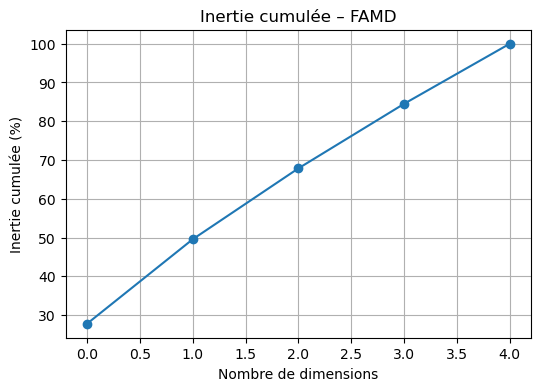

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(np.cumsum(inertia)*100, marker="o")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Inertie cumulée (%)")
plt.title("Inertie cumulée – FAMD")
plt.grid(True)
plt.show()


<Figure size 2000x3000 with 0 Axes>

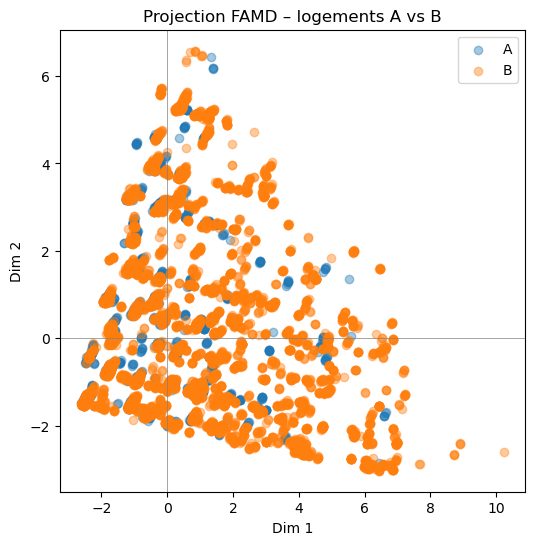

In [110]:
plt.figure(figsize=(20, 30))
coords_plot = coords.iloc[:, :2].copy()
coords_plot["DPE"] = df_ab.loc[coords.index, "etiquette_dpe_mode"]

plt.figure(figsize=(6,6))
for c in ["A","B"]:
    sub = coords_plot[coords_plot["DPE"] == c]
    plt.scatter(sub[0], sub[1], label=c, alpha=0.4)

plt.axhline(0, color="grey", lw=0.5)
plt.axvline(0, color="grey", lw=0.5)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.title("Projection FAMD – logements A vs B")
plt.legend()
plt.show()
# FAMD

*La différence entre A et B n’est pas binaire mais progressive, liée à des facteurs structurels cumulés (isolation, année de construction, typologie du bâtiment).*

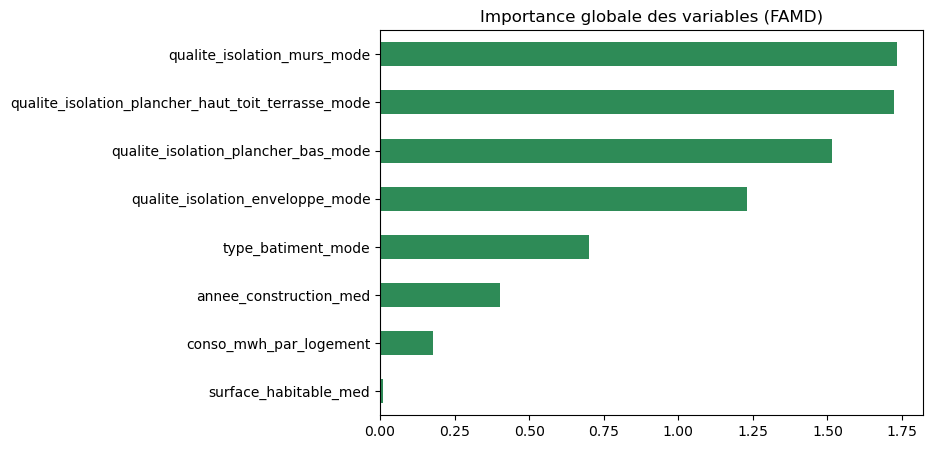

In [111]:
imp_all.sort_values().plot(
    kind="barh",
    figsize=(7,5),
    title="Importance globale des variables (FAMD)", color="#2E8B57"
)
plt.show()


**L’analyse FAMD montre que la performance énergétique des logements A et B est principalement expliquée par la qualité de l’isolation (murs, toiture, planchers), bien avant la consommation observée ou la surface. La classe énergétique reflète donc avant tout des choix structurels et constructifs.**

**ANOVA**


In [297]:
from scipy.stats import f_oneway

for v in num_cols:
    a = df_ab[df_ab["etiquette_dpe_mode"]=="A"][v].dropna()
    b = df_ab[df_ab["etiquette_dpe_mode"]=="B"][v].dropna()

    F, p = f_oneway(a, b)
    print(f"{v:30s}  F={F:.3f}  p={p:.3e}")


annee_construction_med          F=300.166  p=2.089e-66
surface_habitable_med           F=4.150  p=4.166e-02
conso_mwh_par_logement          F=453.801  p=8.440e-99


In [298]:
import numpy as np

def cohens_d(x, y):
    x, y = np.array(x), np.array(y)
    nx, ny = len(x), len(y)
    vx, vy = x.var(ddof=1), y.var(ddof=1)
    pooled = ((nx-1)*vx + (ny-1)*vy) / (nx+ny-2)
    return (x.mean() - y.mean()) / np.sqrt(pooled) if pooled > 0 else 0.0

rows = []
for v in num_cols:
    a = df_ab[df_ab["etiquette_dpe_mode"]=="A"][v].dropna()
    b = df_ab[df_ab["etiquette_dpe_mode"]=="B"][v].dropna()
    d = cohens_d(a, b)
    rows.append((v, d, abs(d)))

eff = pd.DataFrame(rows, columns=["var", "cohens_d", "abs_d"]).sort_values("abs_d", ascending=False)
eff


var  cohens_d     abs_d
2  conso_mwh_par_logement  0.548242  0.548242
0  annee_construction_med  0.445883  0.445883
1   surface_habitable_med -0.052427  0.052427

<Axes: xlabel='etiquette_dpe_mode', ylabel='conso_mwh_par_logement'>

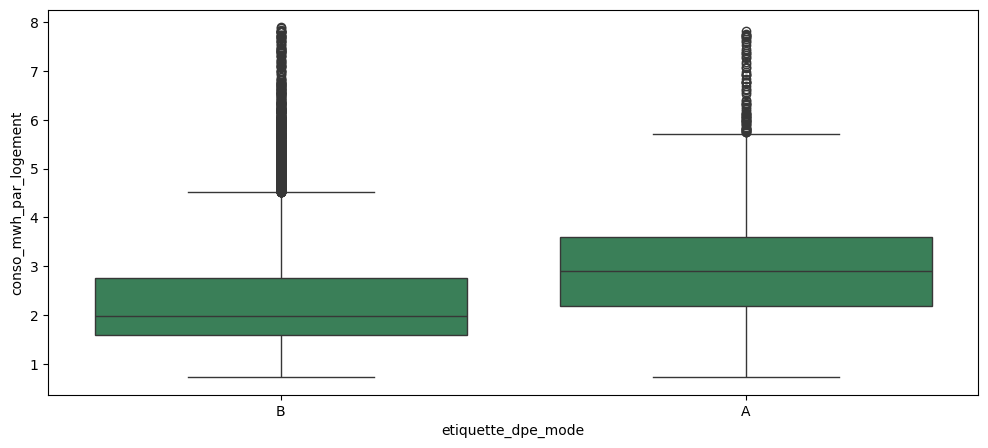

In [112]:

sns.boxplot(data=df_ab, x="etiquette_dpe_mode", y="conso_mwh_par_logement", color="#2E8B57" )


<Axes: xlabel='etiquette_dpe_mode', ylabel='annee_construction_med'>

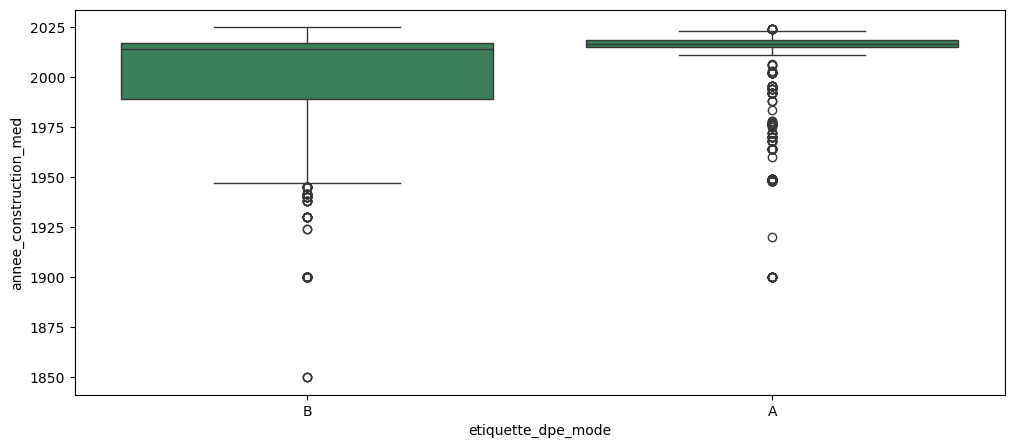

In [123]:
sns.boxplot(data=df_ab, x="etiquette_dpe_mode", y="annee_construction_med", color="#2E8B57")
#Etiquette pae année

*Le FAMD est la méthode principale retenue car elle permet d’identifier les facteurs structurels expliquant la performance énergétique des logements en intégrant simultanément des variables numériques et catégorielles. L’ANOVA est utilisée en complément pour illustrer les différences moyennes observées entre les classes A et B, mais ne permet pas à elle seule d’identifier les causes sous-jacentes.*

*L’ANOVA met en évidence des différences significatives entre les logements A et B, tandis que la FAMD permet d’identifier les facteurs structurels sous-jacents expliquant ces différences, notamment la qualité de l’isolation.*

*Le FAMD a été retenu comme méthode principale car il permet d’identifier les facteurs explicatifs de la performance énergétique en intégrant simultanément des variables numériques et catégorielles, ce que ne permet pas l’ANOVA seule.*

**Modèles ML**

In [114]:
df_q.columns

Index(['join_key', 'code_commune', 'nom_commune', 'code_departement',
       'code_region', 'annee', 'consommation_annuelle_totale_de_ladresse_mwh',
       'consommation_annuelle_moyenne_par_site_de_ladresse_mwh',
       'nombre_de_logements', 'conso_mwh_par_logement', 'type_batiment_mode',
       'annee_construction_med', 'surface_habitable_med',
       'qualite_isolation_enveloppe_mode', 'qualite_isolation_murs_mode',
       'qualite_isolation_plancher_haut_toit_terrasse_mode',
       'qualite_isolation_plancher_bas_mode', 'etiquette_dpe_mode',
       'n_etiquette_dpe_mode', 'etiquette_ges_mode', 'n_etiquette_ges_mode',
       'n_logements_dpe'],
      dtype='object')

In [115]:
import numpy as np
import pandas as pd


In [116]:
# Variable cible : 1 si DPE A ou B, 0 sinon
TARGET_COL = "etiquette_dpe_mode"
POS_LABELS = {"A", "B"}

df = df_q.copy()

df["eco"] = df[TARGET_COL].astype(str).str.upper().isin(POS_LABELS).astype(int)


In [117]:
# Variables structurelles du bâti (indépendantes du calcul DPE)
FEATURES_STRUCT = [
    "type_batiment_mode",
    "annee_construction_med",
    "surface_habitable_med",
    "qualite_isolation_enveloppe_mode",
    "qualite_isolation_murs_mode",
    "qualite_isolation_plancher_haut_toit_terrasse_mode",
    "qualite_isolation_plancher_bas_mode",
    "annee"  # optionnel
]

X = df[FEATURES_STRUCT].copy()
y = df["eco"].copy()

print("Variables utilisées :", X.columns.tolist())
print("Proportion de logements A/B :", y.mean())


Variables utilisées : ['type_batiment_mode', 'annee_construction_med', 'surface_habitable_med', 'qualite_isolation_enveloppe_mode', 'qualite_isolation_murs_mode', 'qualite_isolation_plancher_haut_toit_terrasse_mode', 'qualite_isolation_plancher_bas_mode', 'annee']
Proportion de logements A/B : 0.02418299695828475


In [118]:
#correlation 
from scipy.stats import pointbiserialr

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

pb_results = []

for col in num_cols:
    tmp = X[[col]].join(y).dropna()
    if tmp[col].nunique() > 1:
        r, p = pointbiserialr(tmp["eco"], tmp[col])
        pb_results.append((col, r, p))

pb_df = pd.DataFrame(
    pb_results, columns=["variable", "correlation", "p_value"]
).sort_values("correlation", key=lambda s: s.abs(), ascending=False)

pb_df


variable  correlation       p_value
0  annee_construction_med     0.151689  0.000000e+00
1   surface_habitable_med     0.014452  1.698311e-23

In [119]:
#correletion des variables catégorielle 
from scipy.stats import chi2_contingency

cat_cols = [c for c in X.columns if c not in num_cols]

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    if table.shape[0] < 2 or table.shape[1] < 2:
        return np.nan
    chi2, _, _, _ = chi2_contingency(table)
    n = table.values.sum()
    r, k = table.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1) + 1e-12))

cv_results = []

for col in cat_cols:
    tmp = X[[col]].join(y).dropna()
    cv_results.append((col, cramers_v(tmp[col], tmp["eco"])))

cv_df = pd.DataFrame(
    cv_results, columns=["variable", "cramers_v"]
).sort_values("cramers_v", ascending=False)

cv_df


variable  cramers_v
2                         qualite_isolation_murs_mode   0.227064
3  qualite_isolation_plancher_haut_toit_terrasse_mode   0.148681
1                    qualite_isolation_enveloppe_mode   0.136684
4                 qualite_isolation_plancher_bas_mode   0.052316
0                                  type_batiment_mode   0.051633
5                                               annee   0.015712

In [120]:
#Prétraitement variable categorielles et numériques
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# Pipeline numérique
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline catégoriel (OneHot limité pour performance)
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", min_frequency=50))
])

# Prétraitement global
preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


*Logistic Regression*

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Meilleurs paramètres LR : {'model__C': 10}
              precision    recall  f1-score   support

           0     0.9942    0.7905    0.8808     93229
           1     0.0879    0.8152    0.1588      2310

    accuracy                         0.7911     95539
   macro avg     0.5411    0.8028    0.5198     95539
weighted avg     0.9723    0.7911    0.8633     95539

ROC-AUC : 0.8688112486040169


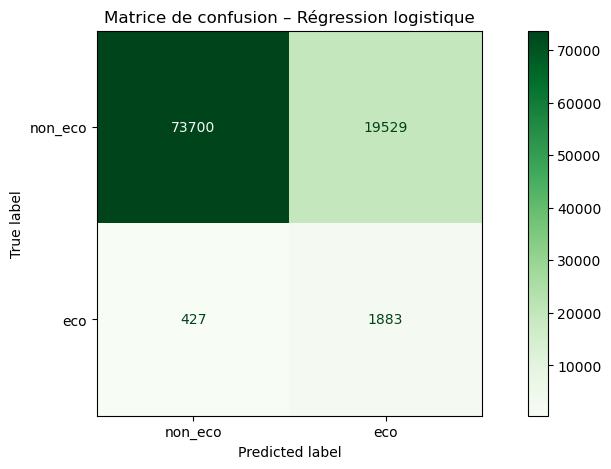

variable      coef  \
12                           qualite_isolation_murs_mode_très bonne  1.036901   
1                                             surface_habitable_med  0.915347   
16    qualite_isolation_plancher_haut_toit_terrasse_mode_très bonne  0.825474   
0                                            annee_construction_med  0.732645   
15       qualite_isolation_plancher_haut_toit_terrasse_mode_moyenne -0.692048   
20                   qualite_isolation_plancher_bas_mode_très bonne -0.568315   
14  qualite_isolation_plancher_haut_toit_terrasse_mode_insuffisante -0.536157   
10                         qualite_isolation_murs_mode_insuffisante -0.481596   
6                     qualite_isolation_enveloppe_mode_insuffisante -0.429678   
4                                         type_batiment_mode_maison  0.394136   
13         qualite_isolation_plancher_haut_toit_terrasse_mode_bonne  0.362838   
11                              qualite_isolation_murs_mode_moyenne -0.319830   
9                                 qualite_isolation_murs_mode_bonne -0.275368   
18                 qualite_isolation_plancher_bas_mode_insuffisante  0.261203   
2                                    type_batiment_mode_appartement -0.243871   
7                          qualite_isolation_enveloppe_mode_moyenne  0.238744   
17                        qualite_isolation_plancher_bas_mode_bonne  0.236125   
5                            qualite_isolation_enveloppe_mode_bonne  0.224211   
3                                       type_batiment_mode_immeuble -0.190158   
8                       qualite_isolation_enveloppe_mode_très bonne -0.073170   

    odds_ratio  abs_coef  
12    2.820464  1.036901  
1     2.497643  0.915347  
16    2.282962  0.825474  
0     2.080577  0.732645  
15    0.500550  0.692048  
20    0.566479  0.568315  
14    0.584992  0.536157  
10    0.617796  0.481596  
6     0.650719  0.429678  
4     1.483103  0.394136  
13    1.437403  0.362838  
11    0.726273  0.319830  
9     0.759292  0.275368  
18    1.298491  0.261203  
2     0.783588  0.243871  
7     1.269654  0.238744  
17    1.266333  0.236125  
5     1.251334  0.224211  
3     0.826828  0.190158  
8     0.929442  0.073170

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
pipe_lr = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=5000,
        class_weight="balanced"
    ))
])

param_grid_lr = {
    "model__C": [0.1, 1, 10]
}

grid_lr = GridSearchCV(
    pipe_lr,
    param_grid=param_grid_lr,
    scoring="f1",
    cv=5,
    n_jobs=1,  # stable sous Windows
    verbose=1
)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
#évaluation 
y_pred_lr = best_lr.predict(X_test)
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

print("Meilleurs paramètres LR :", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_prob_lr))

cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm, display_labels=["non_eco", "eco"]).plot(values_format="d", cmap="Greens")
plt.title("Matrice de confusion – Régression logistique")
plt.show()
#variables importantes
# Récupération des noms après OneHot
ohe = best_lr.named_steps["prep"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])

feature_names = np.array(num_cols + cat_names.tolist())
coefs = best_lr.named_steps["model"].coef_.ravel()

coef_df = pd.DataFrame({
    "variable": feature_names,
    "coef": coefs,
    "odds_ratio": np.exp(coefs),
    "abs_coef": np.abs(coefs)
}).sort_values("abs_coef", ascending=False)

coef_df.head(20)



In [366]:
#Logistic Regression — importance normalisée + variable mère
import numpy as np
import pandas as pd

# coef_df doit contenir: variable, coef, abs_coef (comme chez toi)
lr_imp = coef_df.copy()

# Importance normalisée (%)
lr_imp["importance_norm"] = lr_imp["abs_coef"] / lr_imp["abs_coef"].sum()

# Variable mère (avant le premier "_")
lr_imp["variable_mere"] = lr_imp["variable"].str.split("_").str[0]

# Top features (OneHot)
lr_top_features = lr_imp.sort_values("importance_norm", ascending=False).head(20)

# Top variables mères (somme)
lr_top_mere = (
    lr_imp.groupby("variable_mere", as_index=False)["importance_norm"]
    .sum()
    .sort_values("importance_norm", ascending=False)
)

print("=== Logistic Regression : Top 20 features ===")
display(lr_top_features[["variable", "coef", "odds_ratio", "importance_norm"]])

print("=== Logistic Regression : Top variables mères ===")
display(lr_top_mere.head(10))


=== Logistic Regression : Top 20 features ===


variable      coef  \
12                           qualite_isolation_murs_mode_très bonne  1.042448   
1                                             surface_habitable_med  0.853118   
16    qualite_isolation_plancher_haut_toit_terrasse_mode_très bonne  0.817536   
0                                            annee_construction_med  0.722203   
15       qualite_isolation_plancher_haut_toit_terrasse_mode_moyenne -0.657045   
20                   qualite_isolation_plancher_bas_mode_très bonne -0.575325   
14  qualite_isolation_plancher_haut_toit_terrasse_mode_insuffisante -0.575111   
10                         qualite_isolation_murs_mode_insuffisante -0.476113   
6                     qualite_isolation_enveloppe_mode_insuffisante -0.441621   
4                                         type_batiment_mode_maison  0.396156   
13         qualite_isolation_plancher_haut_toit_terrasse_mode_bonne  0.379648   
9                                 qualite_isolation_murs_mode_bonne -0.309620   
11                              qualite_isolation_murs_mode_moyenne -0.291686   
18                 qualite_isolation_plancher_bas_mode_insuffisante  0.274851   
17                        qualite_isolation_plancher_bas_mode_bonne  0.245170   
2                                    type_batiment_mode_appartement -0.238027   
7                          qualite_isolation_enveloppe_mode_moyenne  0.217536   
5                            qualite_isolation_enveloppe_mode_bonne  0.207262   
3                                       type_batiment_mode_immeuble -0.193100   
21                                                       annee_2018 -0.068128   

    odds_ratio  importance_norm  
12    2.836150         0.114051  
1     2.346954         0.093337  
16    2.264912         0.089444  
0     2.058965         0.079014  
15    0.518381         0.071885  
20    0.562522         0.062945  
14    0.562643         0.062921  
10    0.621194         0.052090  
6     0.642993         0.048316  
4     1.486102         0.043342  
13    1.461770         0.041536  
9     0.733725         0.033875  
11    0.747003         0.031912  
18    1.316334         0.030071  
17    1.277838         0.026823  
2     0.788181         0.026042  
7     1.243011         0.023800  
5     1.230305         0.022676  
3     0.824400         0.021126  
21    0.934141         0.007454

=== Logistic Regression : Top variables mères ===


variable_mere  importance_norm
1       qualite         0.716556
0         annee         0.099596
2       surface         0.093337
3          type         0.090511

*Random forest*

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Meilleurs paramètres RF : {'model__max_depth': 15, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
              precision    recall  f1-score   support

           0     0.9962    0.8971    0.9441     93229
           1     0.1719    0.8623    0.2867      2310

    accuracy                         0.8963     95539
   macro avg     0.5841    0.8797    0.6154     95539
weighted avg     0.9763    0.8963    0.9282     95539

ROC-AUC : 0.937149832937088


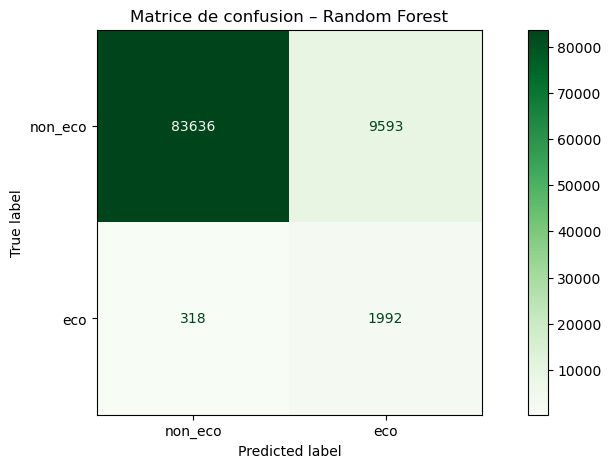

In [122]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced",
        n_jobs=2
    ))
])

param_grid_rf = {
   "model__n_estimators": [200],
    "model__max_depth": [15],
    "model__min_samples_leaf": [1, 5]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_grid_rf,
    scoring="f1",
    cv=3,
    n_jobs=1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
# Evaluation 
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("Meilleurs paramètres RF :", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_prob_rf))

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=["non_eco", "eco"]).plot(values_format="d", cmap="Greens")
plt.title("Matrice de confusion – Random Forest")
plt.show()


In [367]:
#Random Forest — importance normalisée + variable mère
import numpy as np
import pandas as pd

# rf_imp_df doit contenir: variable, importance (ou importance_mean)
rf_imp = rf_imp_df.copy()

# Choisir la colonne d'importance disponible
col_imp = "importance_mean" if "importance_mean" in rf_imp.columns else "importance"

rf_imp["importance_norm"] = rf_imp[col_imp] / (rf_imp[col_imp].sum() + 1e-12)

rf_imp["variable_mere"] = rf_imp["variable"].str.split("_").str[0]

rf_top_features = rf_imp.sort_values("importance_norm", ascending=False).head(20)

rf_top_mere = (
    rf_imp.groupby("variable_mere", as_index=False)["importance_norm"]
    .sum()
    .sort_values("importance_norm", ascending=False)
)

print("=== Random Forest : Top 20 features ===")
display(rf_top_features[["variable", col_imp, "importance_norm"]])

print("=== Random Forest : Top variables mères ===")
display(rf_top_mere.head(10))


=== Random Forest : Top 20 features ===


variable  \
0                                            annee_construction_med   
1                                             surface_habitable_med   
12                           qualite_isolation_murs_mode_très bonne   
14  qualite_isolation_plancher_haut_toit_terrasse_mode_insuffisante   
6                     qualite_isolation_enveloppe_mode_insuffisante   
10                         qualite_isolation_murs_mode_insuffisante   
16    qualite_isolation_plancher_haut_toit_terrasse_mode_très bonne   
20                   qualite_isolation_plancher_bas_mode_très bonne   
5                            qualite_isolation_enveloppe_mode_bonne   
9                                 qualite_isolation_murs_mode_bonne   
8                       qualite_isolation_enveloppe_mode_très bonne   
17                        qualite_isolation_plancher_bas_mode_bonne   
13         qualite_isolation_plancher_haut_toit_terrasse_mode_bonne   
11                              qualite_isolation_murs_mode_moyenne   
7                          qualite_isolation_enveloppe_mode_moyenne   
15       qualite_isolation_plancher_haut_toit_terrasse_mode_moyenne   
18                 qualite_isolation_plancher_bas_mode_insuffisante   
19                      qualite_isolation_plancher_bas_mode_moyenne   
4                                         type_batiment_mode_maison   
2                                    type_batiment_mode_appartement   

    importance  importance_norm  
0     0.330651         0.330651  
1     0.137192         0.137192  
12    0.122246         0.122246  
14    0.074973         0.074973  
6     0.066407         0.066407  
10    0.063716         0.063716  
16    0.043013         0.043013  
20    0.018299         0.018299  
5     0.017886         0.017886  
9     0.015689         0.015689  
8     0.014525         0.014525  
17    0.013532         0.013532  
13    0.012959         0.012959  
11    0.008732         0.008732  
7     0.008519         0.008519  
15    0.008414         0.008414  
18    0.007653         0.007653  
19    0.006249         0.006249  
4     0.005249         0.005249  
2     0.004928         0.004928

=== Random Forest : Top variables mères ===


variable_mere  importance_norm
1       qualite         0.502811
0         annee         0.347289
2       surface         0.137192
3          type         0.012708

*XGBoost*

In [124]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Meilleurs paramètres XGBoost : {'model__colsample_bytree': np.float64(0.9598528437324805), 'model__learning_rate': np.float64(0.11011150117432089), 'model__max_depth': 6, 'model__subsample': np.float64(0.8952665418846558)}
              precision    recall  f1-score   support

           0     0.9797    0.9995    0.9895     93229
           1     0.8952    0.1628    0.2755      2310

    accuracy                         0.9793     95539
   macro avg     0.9375    0.5811    0.6325     95539
weighted avg     0.9776    0.9793    0.9722     95539

ROC-AUC : 0.9634682304184283


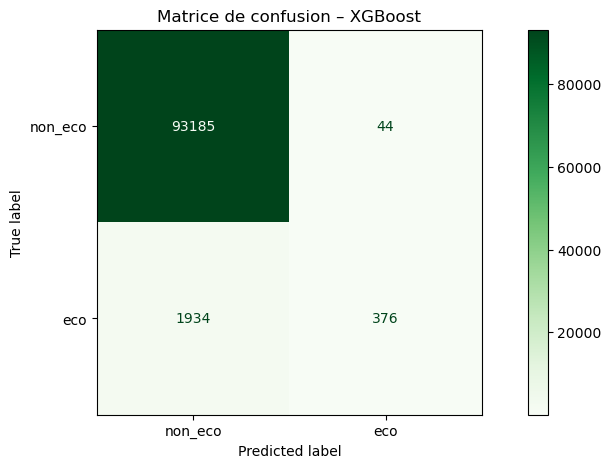

In [125]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
pipe_xgb = Pipeline([
    ("prep", preprocess),
    ("model", XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        tree_method="hist",
        n_estimators=300,
        n_jobs=2
    ))
])

param_dist_xgb = {
    "model__max_depth": randint(3, 7),
    "model__learning_rate": uniform(0.05, 0.1),
    "model__subsample": uniform(0.7, 0.3),
    "model__colsample_bytree": uniform(0.7, 0.3)
}

search_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=10,
    scoring="f1",
    cv=3,
    n_jobs=1,
    random_state=42,
    verbose=1
)

search_xgb.fit(X_train, y_train)
best_xgb = search_xgb.best_estimator_

# Evaluation XGBoost
y_pred_xgb = best_xgb.predict(X_test)
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("Meilleurs paramètres XGBoost :", search_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb, digits=4))
print("ROC-AUC :", roc_auc_score(y_test, y_prob_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm, display_labels=["non_eco", "eco"]).plot(values_format="d", cmap="Greens")
plt.title("Matrice de confusion – XGBoost")
plt.show()


In [369]:
# XGBoost — gain normalisé + variable mère
import pandas as pd

# gain_df doit contenir: variable, gain
xgb_imp = gain_df.copy()

xgb_imp["importance_norm"] = xgb_imp["gain"] / (xgb_imp["gain"].sum() + 1e-12)
xgb_imp["variable_mere"] = xgb_imp["variable"].str.split("_").str[0]

xgb_top_features = xgb_imp.sort_values("importance_norm", ascending=False).head(20)

xgb_top_mere = (
    xgb_imp.groupby("variable_mere", as_index=False)["importance_norm"]
    .sum()
    .sort_values("importance_norm", ascending=False)
)

print("=== XGBoost : Top 20 features ===")
display(xgb_top_features[["variable", "gain", "importance_norm"]])

print("=== XGBoost : Top variables mères ===")
display(xgb_top_mere.head(10))


=== XGBoost : Top 20 features ===


variable  \
12                           qualite_isolation_murs_mode_très bonne   
0                                            annee_construction_med   
14  qualite_isolation_plancher_haut_toit_terrasse_mode_insuffisante   
6                     qualite_isolation_enveloppe_mode_insuffisante   
17                        qualite_isolation_plancher_bas_mode_bonne   
20                   qualite_isolation_plancher_bas_mode_très bonne   
2                                    type_batiment_mode_appartement   
16    qualite_isolation_plancher_haut_toit_terrasse_mode_très bonne   
10                         qualite_isolation_murs_mode_insuffisante   
4                                         type_batiment_mode_maison   
1                                             surface_habitable_med   
8                       qualite_isolation_enveloppe_mode_très bonne   
11                              qualite_isolation_murs_mode_moyenne   
13         qualite_isolation_plancher_haut_toit_terrasse_mode_bonne   
9                                 qualite_isolation_murs_mode_bonne   
15       qualite_isolation_plancher_haut_toit_terrasse_mode_moyenne   
18                 qualite_isolation_plancher_bas_mode_insuffisante   
3                                       type_batiment_mode_immeuble   
5                            qualite_isolation_enveloppe_mode_bonne   
19                      qualite_isolation_plancher_bas_mode_moyenne   

         gain  importance_norm  
12  31.468899         0.116159  
0   26.821407         0.099004  
14  25.769285         0.095120  
6   17.363615         0.064093  
17  16.982082         0.062685  
20  13.880441         0.051236  
2   13.750583         0.050756  
16  11.296426         0.041698  
10  11.139627         0.041119  
4    9.137966         0.033730  
1    8.687343         0.032067  
8    8.556985         0.031586  
11   8.358490         0.030853  
13   7.983278         0.029468  
9    7.943964         0.029323  
15   7.862702         0.029023  
18   7.842602         0.028949  
3    7.536644         0.027819  
5    7.454789         0.027517  
19   6.822438         0.025183

=== XGBoost : Top variables mères ===


variable_mere  importance_norm
1       qualite         0.727693
0         annee         0.127934
3          type         0.112306
2       surface         0.032067

In [323]:
pip install shap

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   -------------------------------------- - 524.3/549.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 549.1/549.1 kB 1.3 MB/s  0:00:00

   -------------------- ------------------- 1/2 [shap]
   -------------------- ------------------- 1/2 [shap]
   ---------------------------------------- 2/2 [shap]

Note: you may need to restart the kernel to use updated packages.


sv2d shape = (300, 28)


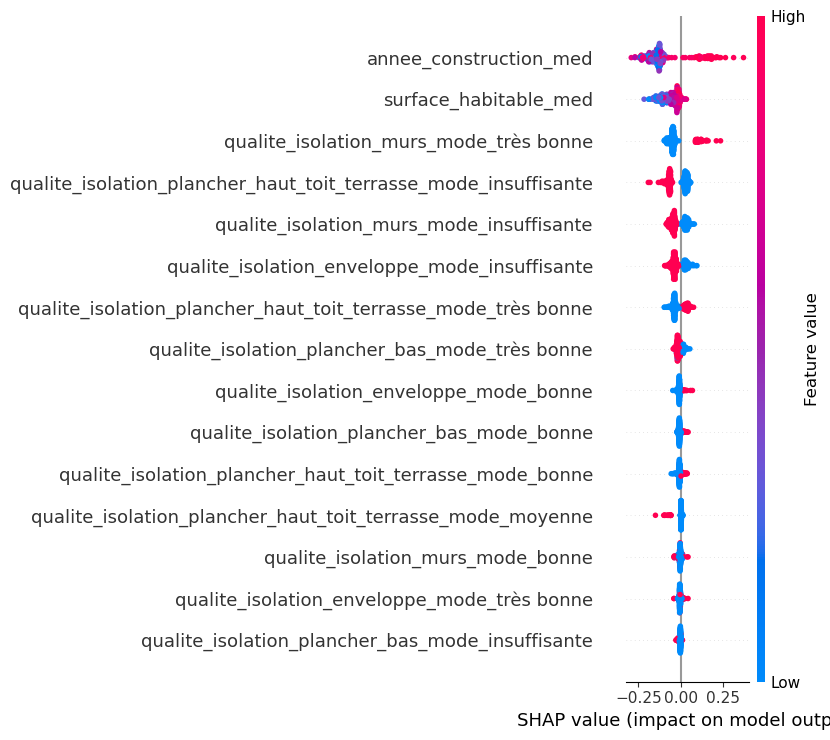

In [381]:
import numpy as np
import shap

sv2d = shap_values[:, :, 1]   # classe eco (1)

print("sv2d shape =", sv2d.shape)  # doit être (300, 28)

# Beeswarm standard : doit afficher "SHAP value"
shap.summary_plot(
    sv2d,
    X_s_trans,
    feature_names=feature_names,
    plot_type="dot",
    max_display=15
)


In [382]:
import pandas as pd

mean_abs = np.abs(sv2d).mean(axis=0)

shap_imp_df = pd.DataFrame({
    "variable": feature_names,
    "mean_abs_shap": mean_abs
}).sort_values("mean_abs_shap", ascending=False)

shap_imp_df["importance_norm"] = shap_imp_df["mean_abs_shap"] / (shap_imp_df["mean_abs_shap"].sum() + 1e-12)
shap_imp_df["importance_pct"] = 100 * shap_imp_df["importance_norm"]

shap_imp_df.head(20)


variable  \
0                                            annee_construction_med   
1                                             surface_habitable_med   
12                           qualite_isolation_murs_mode_très bonne   
14  qualite_isolation_plancher_haut_toit_terrasse_mode_insuffisante   
10                         qualite_isolation_murs_mode_insuffisante   
6                     qualite_isolation_enveloppe_mode_insuffisante   
16    qualite_isolation_plancher_haut_toit_terrasse_mode_très bonne   
20                   qualite_isolation_plancher_bas_mode_très bonne   
5                            qualite_isolation_enveloppe_mode_bonne   
17                        qualite_isolation_plancher_bas_mode_bonne   
13         qualite_isolation_plancher_haut_toit_terrasse_mode_bonne   
15       qualite_isolation_plancher_haut_toit_terrasse_mode_moyenne   
9                                 qualite_isolation_murs_mode_bonne   
8                       qualite_isolation_enveloppe_mode_très bonne   
18                 qualite_isolation_plancher_bas_mode_insuffisante   
11                              qualite_isolation_murs_mode_moyenne   
22                                                       annee_2019   
21                                                       annee_2018   
23                                                       annee_2020   
7                          qualite_isolation_enveloppe_mode_moyenne   

    mean_abs_shap  importance_norm  importance_pct  
0        0.149788         0.278903       27.890338  
1        0.062244         0.115897       11.589716  
12       0.061034         0.113644       11.364444  
14       0.049263         0.091727        9.172725  
10       0.041402         0.077090        7.709041  
6        0.038372         0.071449        7.144858  
16       0.037903         0.070575        7.057471  
20       0.015240         0.028376        2.837627  
5        0.009937         0.018502        1.850207  
17       0.009327         0.017366        1.736605  
13       0.009029         0.016812        1.681158  
15       0.007590         0.014132        1.413216  
9        0.006019         0.011207        1.120655  
8        0.005564         0.010360        1.036004  
18       0.003898         0.007258        0.725793  
11       0.003664         0.006822        0.682196  
22       0.003160         0.005883        0.588348  
21       0.003076         0.005727        0.572679  
23       0.003053         0.005684        0.568416  
7        0.002943         0.005479        0.547927

**Étudier comment les variables clés (notamment l’isolation) influencent la probabilité d’appartenir aux différentes classes énergétiques, au-delà des seules classes A/B.**

In [384]:
# MÉTHODE 1 Analyse par probabilité prédite
# Code : impact d’une variable (ex. isolation des murs)
import pandas as pd
import numpy as np

# 1) Sélectionner les logements non eco
df_non_eco = X_test[y_test == 0].copy()

# 2) Prédiction initiale
proba_before = best_rf.predict_proba(df_non_eco)[:, 1]

# 3) Scénario de rénovation :
# on force la qualité d'isolation des murs à "très bonne"
df_scenario = df_non_eco.copy()

col_mur = "qualite_isolation_murs_mode"
if col_mur in df_scenario.columns:
    df_scenario[col_mur] = "très bonne"

# 4) Nouvelle prédiction
proba_after = best_rf.predict_proba(df_scenario)[:, 1]

# 5) Comparaison
impact_df = pd.DataFrame({
    "proba_avant": proba_before,
    "proba_apres": proba_after
})

impact_df["delta_proba"] = impact_df["proba_apres"] - impact_df["proba_avant"]

impact_df.describe()


proba_avant   proba_apres   delta_proba
count  93229.000000  93229.000000  93229.000000
mean       0.156651      0.254786      0.098135
std        0.220882      0.252676      0.184138
min        0.000000      0.000000     -0.669692
25%        0.037215      0.055611     -0.001315
50%        0.064967      0.148134      0.029958
75%        0.140706      0.380911      0.157215
max        0.965472      0.965472      0.810684

In [385]:
#MÉTHODE 2 — Impact par classe DPE (C, D, E, F…)
# impact par classe initiale
df_impact = df_q.loc[X_test.index].copy()
df_impact["proba_avant"] = best_rf.predict_proba(X_test)[:, 1]

# scénario rénovation
X_scenario = X_test.copy()
X_scenario[col_mur] = "très bonne"

df_impact["proba_apres"] = best_rf.predict_proba(X_scenario)[:, 1]
df_impact["delta_proba"] = df_impact["proba_apres"] - df_impact["proba_avant"]

# Classe DPE initiale
df_impact["classe_dpe"] = df_q.loc[X_test.index, "etiquette_dpe_mode"]

# Moyenne par classe
impact_par_classe = (
    df_impact
    .groupby("classe_dpe")["delta_proba"]
    .mean()
    .sort_index()
)

impact_par_classe


classe_dpe
A   -0.010279
B   -0.058141
C    0.072970
D    0.119498
E    0.110950
F    0.083687
G    0.046209
Name: delta_proba, dtype: float64

In [386]:
#MÉTHODE 3 — Probabilité de changement de classe (seuil)
# taux de bascule
seuil = 0.5

df_impact["eco_avant"] = (df_impact["proba_avant"] >= seuil).astype(int)
df_impact["eco_apres"] = (df_impact["proba_apres"] >= seuil).astype(int)

df_impact["changement"] = df_impact["eco_apres"] - df_impact["eco_avant"]

# Taux global de bascule
taux_bascule = (df_impact["changement"] == 1).mean()
taux_bascule


np.float64(0.0975099174159244)

In [296]:
# Fermer la connexion à DuckDB
con.close()
print("Connexion à DuckDB fermée.")


Connexion à DuckDB fermée.
